## Проект: Линейные модели в машинном обучении

[yandex practicum link](https://practicum.yandex.ru/learn/data-scientist/courses/de273a30-17f9-476d-8f2f-ff55c7fe17fb/sprints/197573/topics/2fdf9dfb-8a1d-463d-9695-4a95fc16cdcf/lessons/6871f4e2-79b3-4902-975f-f5760c64b759/)

<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>

Привет Антон! Меня зовут Марат, и я буду твоим ревьюером. Спешу сообщить что все ключевые этапы в работе выполнены,  с задачей тебе удалось справиться. По поводу обращения - в IT сфере принято общаться на «ты» :) Но, если привычней на «вы», дай знать. Как ревьюера моя задача помочь тебе в развитии, дав хорошие советы. Я внимательно посмотрю твой код, ознакомлюсь с твоими выводами и оставлю комментарии. Где то могу предложить небольшие исправление в коде, но ненавязчиво. Где потребуются уточнения, я оставлю много наводящих вопросов. Они помогут тебя с поиском верного решения.

Все мои комментарии размечены по цветам, для лучшего восприятия. 
    
<div class="alert alert-success">Зеленым цветом и словом «Успех» отмечены особо удачные и элегантные решения, которыми ты можешь гордиться. </div>
        
<div class="alert alert-warning">Желтым и значком словом «Совет», помечены решения у которых есть альтернативные решения, более оптимальные. Ты можешь найти их сразу и доработать проект, или отложить это на потом, для будущих проектах. Проект будет принят и без их доработки. </div>
        
<div class="alert alert-danger"> Красным цветом и значком словом «Ошибка» помечу твои решения, на которые стоит обратить внимание прежде всего. После их доработки проект будет принят. </div>
        
Залог успеха - работа сообща, взаимное уважение и работа в диалоге. Поэтому, помечай свои ответные комментарии на мои реплики заметным цветом или курсивом, так мне будет легче их отслеживать. Пожалуйста, не изменяй и не удаляй мои комментарии. Все это поможет выполнить повторную проверку быстрей.

</div>

### Описание проекта

Вы работаете в IT-компании, которая выполняет на заказ проекты по машинному обучению. К вам обратился фермер, владелец молочного хозяйства «Вольный луг». <font color='red'>Он хочет купить бурёнок, чтобы расширить поголовье стада коров.</font>  Для этого он заключил выгодный контракт с ассоциацией пастбищ «ЭкоФерма».

Условия позволяют фермеру очень тщательно отобрать коров. Он определяет качество молока по строгой методике, и при этом ему нужно выполнять свой план развития молочного хозяйства. Фермер хочет, чтобы <font color='red'>каждая бурёнка давала не менее 6000 килограммов молока в год, а её надой был вкусным — строго по его критериям, ничуть не хуже. </font> А продавцы и технологи так и норовят приукрасить своих коровок!

Поэтому он просит вас разработать модель машинного обучения, которая поможет ему управлять рисками и принимать объективное решение о покупке. «ЭкоФерма» готова предоставить подробные данные о своих коровах. Вам нужно создать <font color='green'>**две прогнозные модели**</font>  для отбора бурёнок в поголовье:
1) Первая будет прогнозировать возможный удой коровы (<font color='red'>целевой признак Удой</font>);

2) Вторая — рассчитывать вероятность получить вкусное молоко от коровы (<font color='red'>целевой признак Вкус молока</font>).

С помощью модели нужно отобрать коров по двум критериям:
- <font color='red'>средний удой за год — не менее 6000 килограммов;</font>
- <font color='red'>молоко должно быть вкусным.</font>

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


здорово что подсветил ключевые моменты

### Описание данных

Файл ferma_main

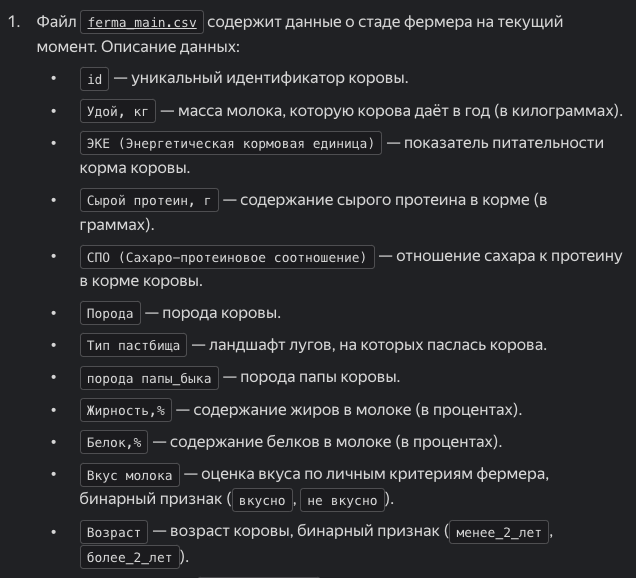

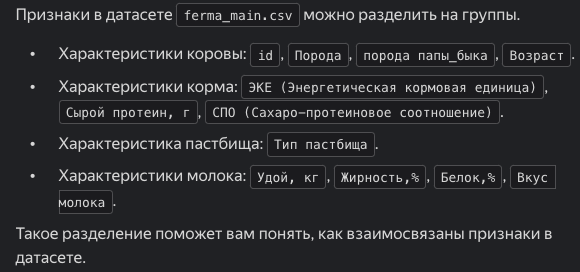

Файлы ferma_dad и cow_buy

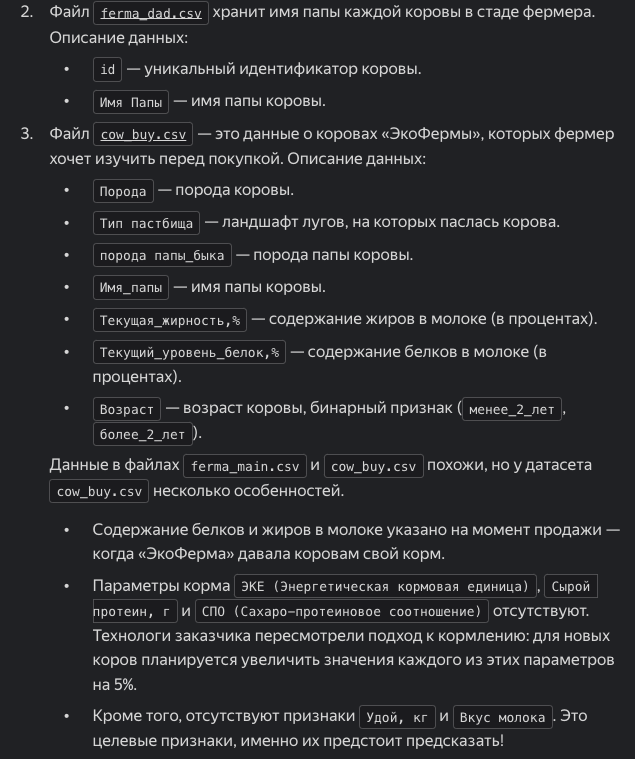

### Шаг 1. Загрузка и изучение данных

## Загрузка и изучение данных

In [1]:
# библиотеки для работы с данными
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import random

# бибилотеки для подготовки данных
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

# библиотеки для линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# библиотеки для логистической регрессии
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

Собираем все импорты в верхней части, чтобы легче было ориентироваться и добавлять новые по необходимости. 

<div class="alert alert-warning">


Совет:

    

   

- есть рекомендации PEP-8 при написании кода, в том числе и для импортов. Если интересно можешь почитать [тут](https://pythonworld.ru/osnovy/pep-8-rukovodstvo-po-napisaniyu-koda-na-python.html). Есть что поправить 



In [2]:
# добавим библиотеку для построения scatter диаграмм рассеяния с тренд-линиями
import plotly.express as px 
import plotly.graph_objects as go

In [3]:
import math

In [8]:
try:
    ferma_df = pd.read_csv('/datasets/ferma_main.csv', sep=';', decimal=',')
    ferma_dad_df= pd.read_csv('/datasets/ferma_dad.csv', sep=';', decimal=',')
    cow_buy_df = pd.read_csv('/datasets/cow_buy.csv', sep=';',decimal=',')
except FileNotFoundError:
    ferma_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_main.csv', sep=';', decimal=',')
    ferma_dad_df= pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/ferma_dad.csv', sep=';',decimal=',')
    cow_buy_df = pd.read_csv('/Users/tony_builder/Documents/GitHub/studying/yandex_practicum/data/cow_buy.csv', sep=';', decimal=',')




<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

    
Ошибка:    
    

- Не забываем указать decimal. Сразу после чтения файла, убеждаемся что данные прочитаны верно, если нет, сразу вносим корректировки в чтение, иначе у нас неопределён верный тип данных, и многие методы и функции корректно не отработают
     


<div class="alert alert-warning">



Совет 🤔:
    
    
- Ещё есть такой интересный аргумент при чтении как  parse_dates - позволяет указать какие столбцы в DataFrame содержат даты и время. Как раз для этого проекта. Если у нас установлен верный тип данных, это значит что мы можем легко вытасиквать информацию о годе, месяце, дня, времени, можем вычитать, прибавлять из столбца с датами другой столбец с датами, получая осмысленную информацию
    
    
Пригодится для будущих проектов

    
    



<div class="alert alert-info"> <b>Комментарии студента:</b> Добавил, в принципе понятна цель. Сразу верно указывать тип данных, которые являются float значениями - явно указать, что они разделены запятыми</div>

#### Основной датасет по коровам

In [9]:
ferma_df.head()

id  Удой, кг  ЭКЕ (Энергетическая кормовая единица)  Сырой протеин, г  \
0   1      5863                                   14.2              1743   
1   2      5529                                   12.8              2138   
2   3      5810                                   14.0              1854   
3   4      5895                                   12.4              2012   
4   5      5302                                   12.8              1675   

   СПО (Сахаро-протеиновое соотношение)           Порода Тип пастбища  \
0                                 0.890   Вис Бик Айдиал    Равнинное   
1                                 0.890   Вис Бик Айдиал    Равнинные   
2                                 0.885  РефлешнСоверинг    Холмистое   
3                                 0.885  РефлешнСоверинг    Холмистое   
4                                 0.885   Вис Бик Айдиал    Равнинные   

  порода папы_быка  Жирность,%  Белок,% Вкус молока      Возраст  
0           Айдиал        3.58    3.076      вкусно  более_2_лет  
1          Соверин        3.54    3.079      вкусно  менее_2_лет  
2          Соверин        3.59    3.074   не вкусно  более_2_лет  
3           Айдиал        3.40    3.075   не вкусно  более_2_лет  
4          Соверин        3.73    3.073      вкусно  менее_2_лет

In [6]:
ferma_df.shape

(634, 12)

In [7]:
ferma_df.id.nunique()

629

Так, строк в датасете 634, а коров - 629. Значит id 5 коров повторяются. Запомнили

Поменяем название столбцов:
- переведем на английский
- устраним пробелы

In [8]:
ferma_df.columns

Index(['id', 'Удой, кг', 'ЭКЕ (Энергетическая кормовая единица)',
       'Сырой протеин, г', 'СПО (Сахаро-протеиновое соотношение)', 'Порода',
       'Тип пастбища', 'порода папы_быка', 'Жирность,%', 'Белок,%',
       'Вкус молока', 'Возраст'],
      dtype='object')

In [10]:
ferma_df.rename(columns={
                        'Удой, кг':'milk_yield_kg',
                        'ЭКЕ (Энергетическая кормовая единица)':'energy_feed_unity',
                        'Сырой протеин, г': 'crude_protein_g',
                        'СПО (Сахаро-протеиновое соотношение)':'sugar_protein_ratio',
                        'Порода':'cow_breed',
                        'Тип пастбища':'pasture_type',
                        'порода папы_быка':'bull_breed',
                        'Жирность,%': 'milk_fat_percent',
                        'Белок,%' : 'percent_protein_in_milk',
                        'Вкус молока': 'milk_taste',
                        'Возраст':'cow_age'
                    
}, inplace=True)




<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех:

👍 помнишь о стилистике


Молодец что используешь rename,  чтобы не думать о порядке. 


    
 <div class="alert alert-warning">


Совет: 


 
- можно было автоматизировать процесс воспользовавшись  .lower, а с помощью регуляризации    (или .rename) избавиться от точек, % итп, а если надо организовать нижние подчёркивание (привезти название столбцов к змеиному коду). Пример регулярного выражения:  
     
	df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower() for i in df.columns]
 



In [11]:
ferma_df.head()

id  milk_yield_kg  energy_feed_unity  crude_protein_g  sugar_protein_ratio  \
0   1           5863               14.2             1743                0.890   
1   2           5529               12.8             2138                0.890   
2   3           5810               14.0             1854                0.885   
3   4           5895               12.4             2012                0.885   
4   5           5302               12.8             1675                0.885   

         cow_breed pasture_type bull_breed  milk_fat_percent  \
0   Вис Бик Айдиал    Равнинное     Айдиал              3.58   
1   Вис Бик Айдиал    Равнинные    Соверин              3.54   
2  РефлешнСоверинг    Холмистое    Соверин              3.59   
3  РефлешнСоверинг    Холмистое     Айдиал              3.40   
4   Вис Бик Айдиал    Равнинные    Соверин              3.73   

   percent_protein_in_milk milk_taste      cow_age  
0                    3.076     вкусно  более_2_лет  
1                    3.079     вкусно  менее_2_лет  
2                    3.074  не вкусно  более_2_лет  
3                    3.075  не вкусно  более_2_лет  
4                    3.073     вкусно  менее_2_лет

#### Датасет по связи коров с быками (кто отец коровы)

In [11]:
ferma_dad_df.head()

id  Имя Папы
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

In [12]:
ferma_dad_df.shape

(629, 2)

Все верно, всего 629 уникальных коров, информация соответствует инфе из основного датасета

Посмотрим, сколько всего уникальных отцов-быков

In [13]:
ferma_dad_df['Имя Папы'].nunique()

4

Всего 4 быка. Посмотрим их имена

In [14]:
ferma_dad_df['Имя Папы'].unique()

array(['Буйный', 'Соловчик', 'Барин', 'Геркулес'], dtype=object)

Переведем название столбца Имя Папы в удобный вид

In [12]:
ferma_dad_df.rename(columns={'Имя Папы': 'bull_name'}, inplace=True)

In [16]:
ferma_dad_df.head()

id bull_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

#### Датасет о коровах, которых планируют купить

In [13]:
cow_buy_df.head()

Порода Тип пастбища порода папы_быка  Имя_папы  \
0   Вис Бик Айдиал    холмистое           Айдиал  Геркулес   
1   Вис Бик Айдиал    равнинное          Соверин    Буйный   
2  РефлешнСоверинг    равнинное          Соверин     Барин   
3  РефлешнСоверинг    холмистое           Айдиал    Буйный   
4  РефлешнСоверинг    равнинное           Айдиал    Буйный   

   Текущая_жирность,%  Текущий_уровень_белок,%      Возраст  
0                3.58                    3.076  более_2_лет  
1                3.54                    3.081  менее_2_лет  
2                3.59                    3.074  более_2_лет  
3                3.40                    3.061  более_2_лет  
4                3.64                    3.074  более_2_лет

In [18]:
cow_buy_df.shape

(20, 7)

Переименуем столбцы

In [14]:
cow_buy_df.rename(columns={
                            'Порода': 'cow_breed',
                            'Тип пастбища': 'pasture_type',
                            'порода папы_быка': 'bull_breed',
                            'Имя_папы':'bull_name',
                            'Текущая_жирность,%': 'milk_fat_percent',
                            'Текущий_уровень_белок,%': 'percent_protein_in_milk',
                            'Возраст':'cow_age'

}, inplace=True)

In [15]:
cow_buy_df.head()

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0   Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
1   Вис Бик Айдиал    равнинное    Соверин    Буйный              3.54   
2  РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
3  РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
4  РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   

   percent_protein_in_milk      cow_age  
0                    3.076  более_2_лет  
1                    3.081  менее_2_лет  
2                    3.074  более_2_лет  
3                    3.061  более_2_лет  
4                    3.074  более_2_лет

всего 20 коров рассматриватся к приобретению

### Шаг 2. Предобработка данных

#### 2.1 Основной датасет по коровам

- проверить наличие пустых значений
- проверить корректность типов данных
- проверить явные и неявные дубликаты
- трансформировать колонку milk_taste (1 - вкусно, 0 - не вкусно)
- трансформировать колонку cow_age на классы - в зависимости от того, сколько их

##### 2.1.1 Пустые значения

In [21]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       634 non-null    int64 
 1   milk_yield_kg            634 non-null    int64 
 2   energy_feed_unity        634 non-null    object
 3   crude_protein_g          634 non-null    int64 
 4   sugar_protein_ratio      634 non-null    object
 5   cow_breed                634 non-null    object
 6   pasture_type             634 non-null    object
 7   bull_breed               634 non-null    object
 8   milk_fat_percent         634 non-null    object
 9   percent_protein_in_milk  634 non-null    object
 10  milk_taste               634 non-null    object
 11  cow_age                  634 non-null    object
dtypes: int64(3), object(9)
memory usage: 59.6+ KB


Пустых значений нет

##### 2.1.2 Корректность типов данных

Столбцы energy_feed_unity,sugar_protein_ratio,milk_fat_percent,percent_protein_in_milk нужно перевести в тип данных float

Причем, сами значения разделены запятой, а должны быть разделены точкой.

Используем функцию и применим к этим столбцам

In [22]:
"""
columns=['energy_feed_unity', 
          'sugar_protein_ratio',
          'milk_fat_percent', 
          'percent_protein_in_milk']

ferma_df[columns] = ferma_df[columns]\
          .apply(lambda x: x.str.replace(',','.').astype('float'))

"""

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Это уже не нужно будет


<div class="alert alert-info"> <b>Комментарии студента:</b> да, согласен, так технологичнее намного. закомментил, чтобы код не выполнялся</div>

In [23]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634 entries, 0 to 633
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       634 non-null    int64  
 1   milk_yield_kg            634 non-null    int64  
 2   energy_feed_unity        634 non-null    float64
 3   crude_protein_g          634 non-null    int64  
 4   sugar_protein_ratio      634 non-null    float64
 5   cow_breed                634 non-null    object 
 6   pasture_type             634 non-null    object 
 7   bull_breed               634 non-null    object 
 8   milk_fat_percent         634 non-null    float64
 9   percent_protein_in_milk  634 non-null    float64
 10  milk_taste               634 non-null    object 
 11  cow_age                  634 non-null    object 
dtypes: float64(4), int64(3), object(5)
memory usage: 59.6+ KB


In [24]:
ferma_df.head()

id  milk_yield_kg  energy_feed_unity  crude_protein_g  sugar_protein_ratio  \
0   1           5863               14.2             1743                0.890   
1   2           5529               12.8             2138                0.890   
2   3           5810               14.0             1854                0.885   
3   4           5895               12.4             2012                0.885   
4   5           5302               12.8             1675                0.885   

         cow_breed pasture_type bull_breed  milk_fat_percent  \
0   Вис Бик Айдиал    Равнинное     Айдиал              3.58   
1   Вис Бик Айдиал    Равнинные    Соверин              3.54   
2  РефлешнСоверинг    Холмистое    Соверин              3.59   
3  РефлешнСоверинг    Холмистое     Айдиал              3.40   
4   Вис Бик Айдиал    Равнинные    Соверин              3.73   

   percent_protein_in_milk milk_taste      cow_age  
0                    3.076     вкусно  более_2_лет  
1                    3.079     вкусно  менее_2_лет  
2                    3.074  не вкусно  более_2_лет  
3                    3.075  не вкусно  более_2_лет  
4                    3.073     вкусно  менее_2_лет

##### 2.1.3 Явные и неявные дубликаты

In [25]:
ferma_df.duplicated().sum()

5

In [26]:
ferma_df[ferma_df.duplicated()]

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
629  627           5970               14.4             1837   
630  627           5970               14.4             1837   
631  627           5970               14.4             1837   
632  627           5970               14.4             1837   
633  627           5970               14.4             1837   

     sugar_protein_ratio        cow_breed pasture_type bull_breed  \
629                 0.88  РефлешнСоверинг    Холмистое    Соверин   
630                 0.88  РефлешнСоверинг    Холмистое    Соверин   
631                 0.88  РефлешнСоверинг    Холмистое    Соверин   
632                 0.88  РефлешнСоверинг    Холмистое    Соверин   
633                 0.88  РефлешнСоверинг    Холмистое    Соверин   

     milk_fat_percent  percent_protein_in_milk milk_taste      cow_age  
629              3.64                    3.075  не вкусно  более_2_лет  
630              3.64                    3.075  не вкусно  более_2_лет  
631              3.64                    3.075  не вкусно  более_2_лет  
632              3.64                    3.075  не вкусно  более_2_лет  
633              3.64                    3.075  не вкусно  более_2_лет

In [27]:
ferma_df.drop_duplicates(inplace=True)

In [28]:
ferma_df.duplicated().sum()

0

Избавились от явных дубликатов

In [29]:
ferma_df.id.nunique()


629

В датасете осталось 629 коров с уникальным id. Это означает, что каждая корова уникальна. Даже если некоторые данные у разных коров совпадают.

неявных дубликатов быть не может

##### 2.1.4 Трансформация колонки milk_taste

In [30]:
ferma_df.milk_taste.unique()

array(['вкусно', 'не вкусно'], dtype=object)

In [16]:
ferma_df.milk_taste = ferma_df.milk_taste.apply(lambda x: 1 if x=='вкусно' else 0)

заодно уточним название столбца

In [17]:
ferma_df.rename(columns={'milk_taste':'is_tasty'}, inplace=True)

In [18]:
ferma_df.sample(5)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
408  409           6272               14.1             1989   
68    69           6179               15.2             2122   
127  128           6623               15.5             2108   
139  140           5833               14.1             1977   
353  354           6455               14.8             1835   

     sugar_protein_ratio        cow_breed pasture_type bull_breed  \
408                 0.93   Вис Бик Айдиал    Равнинное     Айдиал   
68                  0.93   Вис Бик Айдиал    Холмистое    Айдиалл   
127                 0.94   Вис Бик Айдиал    Холмистое    Соверин   
139                 0.89   Вис Бик Айдиал    Равнинное     Айдиал   
353                 0.93  РефлешнСоверинг    Равнинное    Соверин   

     milk_fat_percent  percent_protein_in_milk  is_tasty      cow_age  
408              3.59                    3.077         0  более_2_лет  
68               3.48                    3.080         0  более_2_лет  
127              3.73                    3.078         1  более_2_лет  
139              3.58                    3.078         1  более_2_лет  
353              3.71                    3.072         0  более_2_лет

##### 2.1.5 Трансформация колонки cow_age

In [34]:
ferma_df.cow_age.unique()

array(['более_2_лет', 'менее_2_лет'], dtype=object)

классов "Возраст" всего два. Заменим их на бинарную классификацию: старше 2 лет = 1, младше = 0

Причем будем считать молодой коровой - до двух лет, старой - более двух лет (для имени столбца)

In [19]:
ferma_df.cow_age = ferma_df.cow_age.apply(lambda x: 1 if x=='более_2_лет' else 0)

In [20]:
ferma_df.rename(columns={'cow_age':'is_old'}, inplace=True)

In [21]:
ferma_df.sample(5)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
510  511           5671               15.0             1844   
462  463           6345               16.1             1958   
121  122           6350               15.7             1914   
277  278           6112               14.6             1988   
478  479           5882               12.8             1746   

     sugar_protein_ratio        cow_breed pasture_type bull_breed  \
510                 0.89  РефлешнСоверинг    Холмистое    Соверин   
462                 0.93  РефлешнСоверинг    Холмистое    Соверин   
121                 0.93   Вис Бик Айдиал    Равнинное    Соверин   
277                 0.93  РефлешнСоверинг    Холмистое    Соверин   
478                 0.85   Вис Бик Айдиал    Равнинное    Соверин   

     milk_fat_percent  percent_protein_in_milk  is_tasty  is_old  
510              3.63                    3.076         1       1  
462              3.71                    3.073         0       1  
121              3.73                    3.075         0       1  
277              3.73                    3.075         0       1  
478              3.41                    3.077         0       1

In [38]:
ferma_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       629 non-null    int64  
 1   milk_yield_kg            629 non-null    int64  
 2   energy_feed_unity        629 non-null    float64
 3   crude_protein_g          629 non-null    int64  
 4   sugar_protein_ratio      629 non-null    float64
 5   cow_breed                629 non-null    object 
 6   pasture_type             629 non-null    object 
 7   bull_breed               629 non-null    object 
 8   milk_fat_percent         629 non-null    float64
 9   percent_protein_in_milk  629 non-null    float64
 10  is_tasty                 629 non-null    int64  
 11  is_old                   629 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 63.9+ KB


##### 2.1.6 Выводы 

- пустых значений нет
- дубликаты убрали
- типы данных исправили
- столбцы вкус молока (1-вкусно, 0 - невкусно) и возраст коровы (1-старше 2 лет, 0 - младше) привели в бинарный вид

#### 2.2 Предобработка датасета по быкам

In [39]:
ferma_dad_df.head()

id bull_name
0   1    Буйный
1   2  Соловчик
2   3     Барин
3   4    Буйный
4   5     Барин

Повторы быков будут - их всего 4 шт на ферме. каждой корове (их 629) соответствует свой папа-бык.

предобработки не требуется

#### 2.3 Предобработка датасета по покупным коровам

Помним, что их 20 шт, посмотрим на весь датасет

Еще раз запомним тот факт, что данные в столбцах milk_fat_percent и percent_protein_in_milk - Содержание белков и жиров в молоке указаны на момент продажи — <font color='red'>когда «ЭкоФерма» давала коровам свой корм.</font> 

In [22]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
1    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.54   
2   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
3   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
4   РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   
5   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.63   
6    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
7    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.57   
8   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
9   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
10   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
11  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.73   
12   Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.68   
13   Вис Бик Айдиал    холмистое    Соверин     Барин              3.42   
14  РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
15  РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
16   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
17  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.77   
18   Вис Бик Айдиал    равнинное    Соверин    Буйный              3.34   
19  РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   

    percent_protein_in_milk      cow_age  
0                     3.076  более_2_лет  
1                     3.081  менее_2_лет  
2                     3.074  более_2_лет  
3                     3.061  более_2_лет  
4                     3.074  более_2_лет  
5                     3.053  менее_2_лет  
6                     3.076  более_2_лет  
7                     3.079  более_2_лет  
8                     3.074  более_2_лет  
9                     3.079  менее_2_лет  
10                    3.055  более_2_лет  
11                    3.073  более_2_лет  
12                    3.046  более_2_лет  
13                    3.075  менее_2_лет  
14                    3.074  более_2_лет  
15                    3.065  более_2_лет  
16                    3.079  более_2_лет  
17                    3.053  менее_2_лет  
18                    3.069  более_2_лет  
19                    3.074  более_2_лет

Кстати, примечательно, что порода папы-быка отнюдь не является определяющим породы коровы. Породы папы и дитя могут отличаться.

и еще одна особенность данных: порода быка определена одним словом, а порода коровы - несколькими.

Например, порода быка "Соверин", а коровы "РефлешнСоверинг"

Возможно, потребуется привести данные в один формат

In [41]:
cow_buy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   cow_breed                20 non-null     object
 1   pasture_type             20 non-null     object
 2   bull_breed               20 non-null     object
 3   bull_name                20 non-null     object
 4   milk_fat_percent         20 non-null     object
 5   percent_protein_in_milk  20 non-null     object
 6   cow_age                  20 non-null     object
dtypes: object(7)
memory usage: 1.2+ KB


А так, "проблемы" в общем-то те же:

- посмотреть пустые значения - их нет
- заменить типы данных для столбцов milk_fat_percent и percent_protein_in_milk на float 
- посмотреть дубликаты
- трансформировать столбец cow_age

In [43]:
cow_buy_df.duplicated().sum()

4

In [23]:
cow_buy_df[cow_buy_df.duplicated()]

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
6    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
8   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
14  РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
19  РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   

    percent_protein_in_milk      cow_age  
6                     3.076  более_2_лет  
8                     3.074  более_2_лет  
14                    3.074  более_2_лет  
19                    3.074  более_2_лет

In [45]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
1    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.54   
2   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
3   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
4   РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   
5   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.63   
6    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
7    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.57   
8   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
9   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
10   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
11  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.73   
12   Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.68   
13   Вис Бик Айдиал    холмистое    Соверин     Барин              3.42   
14  РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
15  РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
16   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
17  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.77   
18   Вис Бик Айдиал    равнинное    Соверин    Буйный              3.34   
19  РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   

    percent_protein_in_milk      cow_age  
0                     3.076  более_2_лет  
1                     3.081  менее_2_лет  
2                     3.074  более_2_лет  
3                     3.061  более_2_лет  
4                     3.074  более_2_лет  
5                     3.053  менее_2_лет  
6                     3.076  более_2_лет  
7                     3.079  более_2_лет  
8                     3.074  более_2_лет  
9                     3.079  менее_2_лет  
10                    3.055  более_2_лет  
11                    3.073  более_2_лет  
12                    3.046  более_2_лет  
13                    3.075  менее_2_лет  
14                    3.074  более_2_лет  
15                    3.065  более_2_лет  
16                    3.079  более_2_лет  
17                    3.053  менее_2_лет  
18                    3.069  более_2_лет  
19                    3.074  более_2_лет

Да, целых 4 дубликата, уберем их

In [24]:
cow_buy_df.drop_duplicates(inplace=True)

In [25]:
cow_buy_df.duplicated().sum()

0

In [26]:
cow_buy_df.reset_index(drop=True, inplace=True)

In [27]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
1    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.54   
2   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
3   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
4   РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   
5   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.63   
6    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.57   
7   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
8    Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
9   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.73   
10   Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.68   
11   Вис Бик Айдиал    холмистое    Соверин     Барин              3.42   
12  РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
13   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
14  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.77   
15   Вис Бик Айдиал    равнинное    Соверин    Буйный              3.34   

    percent_protein_in_milk      cow_age  
0                     3.076  более_2_лет  
1                     3.081  менее_2_лет  
2                     3.074  более_2_лет  
3                     3.061  более_2_лет  
4                     3.074  более_2_лет  
5                     3.053  менее_2_лет  
6                     3.079  более_2_лет  
7                     3.079  менее_2_лет  
8                     3.055  более_2_лет  
9                     3.073  более_2_лет  
10                    3.046  более_2_лет  
11                    3.075  менее_2_лет  
12                    3.065  более_2_лет  
13                    3.079  более_2_лет  
14                    3.053  менее_2_лет  
15                    3.069  более_2_лет

Всего 16 коров для покупки

Трансформируем столбец с возрастом коровы по принципу пункта 2.1.5 для основного датасета

In [28]:
cow_buy_df.cow_age = cow_buy_df.cow_age\
    .apply(lambda x: 1 if x=='более_2_лет' else 0)

In [29]:
cow_buy_df.rename(columns={'cow_age': 'is_old'}, inplace=True)

In [30]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0    Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.58   
1    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.54   
2   РефлешнСоверинг    равнинное    Соверин     Барин              3.59   
3   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
4   РефлешнСоверинг    равнинное     Айдиал    Буйный              3.64   
5   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.63   
6    Вис Бик Айдиал    равнинное    Соверин    Буйный              3.57   
7   РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
8    Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
9   РефлешнСоверинг    равнинное    Соверин  Геркулес              3.73   
10   Вис Бик Айдиал    холмистое     Айдиал  Геркулес              3.68   
11   Вис Бик Айдиал    холмистое    Соверин     Барин              3.42   
12  РефлешнСоверинг    холмистое     Айдиал    Буйный              3.40   
13   Вис Бик Айдиал    холмистое    Соверин  Соловчик              3.73   
14  РефлешнСоверинг    равнинное    Соверин  Геркулес              3.77   
15   Вис Бик Айдиал    равнинное    Соверин    Буйный              3.34   

    percent_protein_in_milk  is_old  
0                     3.076       1  
1                     3.081       0  
2                     3.074       1  
3                     3.061       1  
4                     3.074       1  
5                     3.053       0  
6                     3.079       1  
7                     3.079       0  
8                     3.055       1  
9                     3.073       1  
10                    3.046       1  
11                    3.075       0  
12                    3.065       1  
13                    3.079       1  
14                    3.053       0  
15                    3.069       1

Выводы по датасету с коровами для покупки

- пустых значений нет
- дубликаты убрали - всего 16 коров
- колонку с возрастом коров преобразовали
- вероятно потребуется трансформация колонок с породами: видно, что их всего две (Соверин и Айдиал), причем для основного датасета коров фермы тоже

#### 2.4  Породы коров и быков

Посмотрим еще раз на породы коров и быков в обоих датасетах: существующие на ферме и доступные к продаже

In [53]:
# породы коров на ферме
ferma_df.cow_breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [54]:
# породы быков-отцов коров на ферме
ferma_df.bull_breed.unique()

array(['Айдиал', 'Соверин', 'Айдиалл'], dtype=object)

In [55]:
# породы коров на продажу
cow_buy_df.cow_breed.unique()

array(['Вис Бик Айдиал', 'РефлешнСоверинг'], dtype=object)

In [56]:
# породы быков-отцов коров на продажу
cow_buy_df.bull_breed.unique()

array(['Айдиал', 'Соверин'], dtype=object)

Вывод:
- всего в данных изучаются два типа пород коров и быков - "Соверин" и "Айдиал" (соответствует [статье](https://studbooks.net/1129082/agropromyshlennost/osnovnye_linii_golshtinskogo_skota) о "линиях" или породах коров)

- нашлись опечатки в породе быков-отцов коров на ферме (Айдиалл и Айдиал)

Приведем все к единому виду - и для коров и для быков в обоих датасетах

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Редко кто обращает на это внимание


In [31]:
def rename_breed(some_name):
    
    if some_name == 'Вис Бик Айдиал' or  some_name == 'Айдиалл':
        some_name= 'Айдиал'
    elif some_name== 'РефлешнСоверинг':
        some_name= 'Соверин'
    else: some_name= some_name
    return some_name

In [32]:
for dataset in [ferma_df, cow_buy_df]:
    for col in ['cow_breed', 'bull_breed']:
        dataset[col] = dataset[col].apply(rename_breed)
        

In [33]:
cow_buy_df

cow_breed pasture_type bull_breed bull_name  milk_fat_percent  \
0     Айдиал    холмистое     Айдиал  Геркулес              3.58   
1     Айдиал    равнинное    Соверин    Буйный              3.54   
2    Соверин    равнинное    Соверин     Барин              3.59   
3    Соверин    холмистое     Айдиал    Буйный              3.40   
4    Соверин    равнинное     Айдиал    Буйный              3.64   
5    Соверин    равнинное    Соверин  Геркулес              3.63   
6     Айдиал    равнинное    Соверин    Буйный              3.57   
7    Соверин    холмистое     Айдиал    Буйный              3.40   
8     Айдиал    холмистое    Соверин  Соловчик              3.73   
9    Соверин    равнинное    Соверин  Геркулес              3.73   
10    Айдиал    холмистое     Айдиал  Геркулес              3.68   
11    Айдиал    холмистое    Соверин     Барин              3.42   
12   Соверин    холмистое     Айдиал    Буйный              3.40   
13    Айдиал    холмистое    Соверин  Соловчик              3.73   
14   Соверин    равнинное    Соверин  Геркулес              3.77   
15    Айдиал    равнинное    Соверин    Буйный              3.34   

    percent_protein_in_milk  is_old  
0                     3.076       1  
1                     3.081       0  
2                     3.074       1  
3                     3.061       1  
4                     3.074       1  
5                     3.053       0  
6                     3.079       1  
7                     3.079       0  
8                     3.055       1  
9                     3.073       1  
10                    3.046       1  
11                    3.075       0  
12                    3.065       1  
13                    3.079       1  
14                    3.053       0  
15                    3.069       1

In [60]:
ferma_df.sample(10)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
377  378           5650               11.9             1682   
129  130           5692               12.7             1912   
317  318           5574               14.7             1834   
210  211           6723               16.4             1894   
120  121           5784               11.8             1664   
218  219           6456               16.5             1687   
439  440           6342               13.4             1821   
152  153           5778               13.3             2216   
92    93           5931               15.6             1783   
598  599           6584               16.4             2309   

     sugar_protein_ratio cow_breed pasture_type bull_breed  milk_fat_percent  \
377                0.840    Айдиал    Равнинное    Соверин              3.22   
129                0.850    Айдиал    Равнинное    Соверин              3.44   
317                0.880    Айдиал    Холмистое    Соверин              3.64   
210                0.940    Айдиал    Равнинное     Айдиал              3.72   
120                0.890    Айдиал    Равнинное    Соверин              3.44   
218                0.940    Айдиал    Равнинное     Айдиал              3.72   
439                0.930   Соверин    Холмистое     Айдиал              3.61   
152                0.890    Айдиал    Равнинное    Соверин              3.59   
92                 0.895    Айдиал    Холмистое     Айдиал              3.57   
598                0.940   Соверин    Холмистое    Соверин              3.72   

     percent_protein_in_milk  is_tasty  is_old  
377                    3.073         0       1  
129                    3.074         0       1  
317                    3.081         0       0  
210                    3.074         1       1  
120                    3.073         0       1  
218                    3.073         1       1  
439                    3.076         0       1  
152                    3.079         1       1  
92                     3.073         1       1  
598                    3.076         1       1

- привели породы коров и быков к одному формату (Айдиал и Соверин)
- устранили опечатку

На этом этапе можно перевести породы быков и коров в бинарный вид (их всего два)

Пусть Соверин - это класс 1, Айдиал - класс 0

In [34]:
for dataset in [ferma_df, cow_buy_df]:
    for col in ['cow_breed', 'bull_breed']:
        dataset[col] = dataset[col].apply(lambda x: 1 if x=='Соверин' else 0)
    dataset.rename(columns={'cow_breed': 'cow_is_sovering', 'bull_breed':'bull_is_sovering'}, inplace=True)    

    

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Это можно было и не делать


<div class="alert alert-info"> <b>Комментарии студента:</b> почему? я далее использую этот признак для предсказания. Но да, это можно сделать на этапе кодировки OneHotCode</div>

In [62]:
ferma_df.sample(10)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
406  407           6405               16.3             2206   
276  277           5432               14.2             1933   
217  218           6559               14.7             1796   
288  289           7014               15.7             1946   
519  520           5967               13.6             1873   
139  140           5833               14.1             1977   
145  146           5263               12.3             1960   
534  535           6660               14.8             1764   
107  108           6392               14.9             1742   
72    73           5718               13.7             2212   

     sugar_protein_ratio  cow_is_sovering pasture_type  bull_is_sovering  \
406                0.940                1    Равнинное                 1   
276                0.890                1    Холмистое                 1   
217                0.930                0    Холмистое                 0   
288                0.940                1    Холмистое                 0   
519                0.840                0    Холмистое                 0   
139                0.890                0    Равнинное                 0   
145                0.850                0    Равнинное                 1   
534                0.930                0    Холмистое                 0   
107                0.930                0    Равнинное                 0   
72                 0.895                1    Холмистое                 0   

     milk_fat_percent  percent_protein_in_milk  is_tasty  is_old  
406              3.72                    3.075         1       1  
276              3.64                    3.077         1       0  
217              3.71                    3.073         0       1  
288              3.25                    3.077         1       1  
519              3.63                    3.073         0       1  
139              3.58                    3.078         1       1  
145              3.44                    3.072         0       0  
534              3.72                    3.079         0       1  
107              3.72                    3.073         1       1  
72               3.61                    3.077         1       1

In [35]:
cow_buy_df

cow_is_sovering pasture_type  bull_is_sovering bull_name  \
0                 0    холмистое                 0  Геркулес   
1                 0    равнинное                 1    Буйный   
2                 1    равнинное                 1     Барин   
3                 1    холмистое                 0    Буйный   
4                 1    равнинное                 0    Буйный   
5                 1    равнинное                 1  Геркулес   
6                 0    равнинное                 1    Буйный   
7                 1    холмистое                 0    Буйный   
8                 0    холмистое                 1  Соловчик   
9                 1    равнинное                 1  Геркулес   
10                0    холмистое                 0  Геркулес   
11                0    холмистое                 1     Барин   
12                1    холмистое                 0    Буйный   
13                0    холмистое                 1  Соловчик   
14                1    равнинное                 1  Геркулес   
15                0    равнинное                 1    Буйный   

    milk_fat_percent  percent_protein_in_milk  is_old  
0               3.58                    3.076       1  
1               3.54                    3.081       0  
2               3.59                    3.074       1  
3               3.40                    3.061       1  
4               3.64                    3.074       1  
5               3.63                    3.053       0  
6               3.57                    3.079       1  
7               3.40                    3.079       0  
8               3.73                    3.055       1  
9               3.73                    3.073       1  
10              3.68                    3.046       1  
11              3.42                    3.075       0  
12              3.40                    3.065       1  
13              3.73                    3.079       1  
14              3.77                    3.053       0  
15              3.34                    3.069       1

#### 2.5 Тип пастбища 


In [64]:
ferma_df.pasture_type.unique()

array(['Равнинное', 'Равнинные', 'Холмистое'], dtype=object)

In [65]:
cow_buy_df.pasture_type.unique()

array(['холмистое', 'равнинное'], dtype=object)

Результат: нужно привести к единому виду (нижний регистр, единое склонение) - так мы приведем тип пастбищ к двум классам и сразу же изменим их на бинарную классификацию: 
- назовем столбец is_hill 
- 1 - холмистая местность
- 0 - равнинная  

In [36]:
for dataset in [ferma_df, cow_buy_df]:
    dataset.pasture_type = dataset.pasture_type\
        .apply(lambda x: 1 if x in (['холмистое', 'Холмистое']) else 0)
    dataset.rename(columns={'pasture_type': 'pasture_is_hill'}, inplace=True)
        

In [67]:
ferma_df.sample(5)

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
135  136           7207               16.6             2343   
32    33           6930               15.7             1788   
73    74           5381               12.9             1804   
371  372           6592               15.4             1810   
234  235           7067               15.8             2053   

     sugar_protein_ratio  cow_is_sovering  pasture_is_hill  bull_is_sovering  \
135                0.940                0                1                 0   
32                 0.940                1                1                 0   
73                 0.895                1                0                 0   
371                0.930                1                0                 0   
234                0.940                0                1                 0   

     milk_fat_percent  percent_protein_in_milk  is_tasty  is_old  
135              3.72                    3.078         1       1  
32               3.72                    3.079         1       1  
73               3.61                    3.074         0       0  
371              3.72                    3.073         0       1  
234              3.73                    3.079         1       1

In [68]:
cow_buy_df

cow_is_sovering  pasture_is_hill  bull_is_sovering bull_name  \
0                 0                1                 0  Геркулес   
1                 0                0                 1    Буйный   
2                 1                0                 1     Барин   
3                 1                1                 0    Буйный   
4                 1                0                 0    Буйный   
5                 1                0                 1  Геркулес   
6                 0                0                 1    Буйный   
7                 1                1                 0    Буйный   
8                 0                1                 1  Соловчик   
9                 1                0                 1  Геркулес   
10                0                1                 0  Геркулес   
11                0                1                 1     Барин   
12                1                1                 0    Буйный   
13                0                1                 1  Соловчик   
14                1                0                 1  Геркулес   
15                0                0                 1    Буйный   

    milk_fat_percent  percent_protein_in_milk  is_old  
0               3.58                    3.076       1  
1               3.54                    3.081       0  
2               3.59                    3.074       1  
3               3.40                    3.061       1  
4               3.64                    3.074       1  
5               3.63                    3.053       0  
6               3.57                    3.079       1  
7               3.40                    3.079       0  
8               3.73                    3.055       1  
9               3.73                    3.073       1  
10              3.68                    3.046       1  
11              3.42                    3.075       0  
12              3.40                    3.065       1  
13              3.73                    3.079       1  
14              3.77                    3.053       0  
15              3.34                    3.069       1

Напоследок примерджим имя быка к датасету фермы - и больше не будем обращаться к ferma_dad_df

In [37]:
ferma_df = ferma_df.merge(ferma_dad_df,
               how='left',
               on='id')

In [38]:
ferma_df.head()

id  milk_yield_kg  energy_feed_unity  crude_protein_g  sugar_protein_ratio  \
0   1           5863               14.2             1743                0.890   
1   2           5529               12.8             2138                0.890   
2   3           5810               14.0             1854                0.885   
3   4           5895               12.4             2012                0.885   
4   5           5302               12.8             1675                0.885   

   cow_is_sovering  pasture_is_hill  bull_is_sovering  milk_fat_percent  \
0                0                0                 0              3.58   
1                0                0                 1              3.54   
2                1                1                 1              3.59   
3                1                1                 0              3.40   
4                0                0                 1              3.73   

   percent_protein_in_milk  is_tasty  is_old bull_name  
0                    3.076         1       1    Буйный  
1                    3.079         1       0  Соловчик  
2                    3.074         0       1     Барин  
3                    3.075         0       1    Буйный  
4                    3.073         1       0     Барин

#### 2.5 Выводы по шагу 2



Посмотрим, что у нас получилось в итоге

In [39]:
for dataset in [ferma_df, ferma_dad_df, cow_buy_df]:
    print(dataset.info())
    print(dataset.shape)
    print(dataset.duplicated().sum())
    print()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 634 entries, 0 to 633
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       634 non-null    int64  
 1   milk_yield_kg            634 non-null    int64  
 2   energy_feed_unity        634 non-null    float64
 3   crude_protein_g          634 non-null    int64  
 4   sugar_protein_ratio      634 non-null    float64
 5   cow_is_sovering          634 non-null    int64  
 6   pasture_is_hill          634 non-null    int64  
 7   bull_is_sovering         634 non-null    int64  
 8   milk_fat_percent         634 non-null    float64
 9   percent_protein_in_milk  634 non-null    float64
 10  is_tasty                 634 non-null    int64  
 11  is_old                   634 non-null    int64  
 12  bull_name                634 non-null    object 
dtypes: float64(4), int64(8), object(1)
memory usage: 69.3+ KB
None
(634, 13)
5

<cla

1) пустые значения убрали

2) типы данных привели в порядок
3) дубликаты удалили
4) колонки с категориальными признаками привели в бинарный вид: 
    - cow_is_sovering, bull_is_sovering (1 - порода Соверин, 0 - порода Айдиал)
    - is_tasty (1- вкусное молоко, 0 - невкусное)
    - pasture_is_hill (1 - холмистое пастбище, 0 - равнинное)
    - is_old (1 - корова старше 2 лет, 0 - младше двух лет)

5) остается только колонка bull_name с именами быков-отцов. Их всего 4 вида:
    - Буйный
    - Соловчик
    - Барин
    - Геркулес

Это категориальный признак, с ним решим на этапе подготовки данных

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



некорректность в данных почищина


### Шаг 3. Исследовательский анализ данных

#### 3.1 Статистический анализ данных



In [72]:
print('Статистические параметры датасета Ферма')
ferma_df.describe().T

Статистические параметры датасета Ферма


count         mean          std       min       25%  \
id                       629.0   315.000000   181.720940     1.000   158.000   
milk_yield_kg            629.0  6188.750397  1644.795489  5204.000  5751.000   
energy_feed_unity        629.0    14.543879     1.306408    10.900    13.500   
crude_protein_g          629.0  1923.364070   182.956251  1660.000  1771.000   
sugar_protein_ratio      629.0     0.913116     0.032203     0.840     0.890   
cow_is_sovering          629.0     0.406995     0.491665     0.000     0.000   
pasture_is_hill          629.0     0.558029     0.497017     0.000     0.000   
bull_is_sovering         629.0     0.494436     0.500367     0.000     0.000   
milk_fat_percent         629.0     3.603657     0.168656     2.990     3.590   
percent_protein_in_milk  629.0     3.075671     0.002549     3.069     3.074   
is_tasty                 629.0     0.589825     0.492257     0.000     0.000   
is_old                   629.0     0.825119     0.380167     0.000     1.000   

                              50%       75%        max  
id                        315.000   472.000    629.000  
milk_yield_kg            6133.000  6501.000  45616.000  
energy_feed_unity          14.700    15.600     16.800  
crude_protein_g          1888.000  2062.000   2349.000  
sugar_protein_ratio         0.930     0.940      0.960  
cow_is_sovering             0.000     1.000      1.000  
pasture_is_hill             1.000     1.000      1.000  
bull_is_sovering            0.000     1.000      1.000  
milk_fat_percent            3.650     3.720      3.750  
percent_protein_in_milk     3.076     3.077      3.085  
is_tasty                    1.000     1.000      1.000  
is_old                      1.000     1.000      1.000



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>

Успех: 


Думаешь о удобстве представления данных, применив метод df.T
<div>

In [73]:
print('Статистические параметры датасета Коровы на продажу')
cow_buy_df.describe().T

Статистические параметры датасета Коровы на продажу


count      mean       std    min     25%     50%  \
cow_is_sovering           16.0  0.500000  0.516398  0.000  0.0000  0.5000   
pasture_is_hill           16.0  0.500000  0.516398  0.000  0.0000  0.5000   
bull_is_sovering          16.0  0.625000  0.500000  0.000  0.0000  1.0000   
milk_fat_percent          16.0  3.571875  0.141620  3.340  3.4150  3.5850   
percent_protein_in_milk   16.0  3.068250  0.011264  3.046  3.0595  3.0735   
is_old                    16.0  0.687500  0.478714  0.000  0.0000  1.0000   

                             75%    max  
cow_is_sovering          1.00000  1.000  
pasture_is_hill          1.00000  1.000  
bull_is_sovering         1.00000  1.000  
milk_fat_percent         3.69250  3.770  
percent_protein_in_milk  3.07675  3.081  
is_old                   1.00000  1.000

In [74]:
cow_buy_df.milk_fat_percent.quantile(0.75)

3.6925

In [75]:
cow_buy_df.describe().T.loc['cow_is_sovering', 'std']

0.5163977794943222

#### 3.2 Графики параметров



In [76]:
ferma_df.columns

Index(['id', 'milk_yield_kg', 'energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_tasty', 'is_old', 'bull_name'],
      dtype='object')

Сначала сохраним имена столбцов в словарь, чтобы удобнее было читать графики

In [40]:
dict_names= \
{'milk_yield_kg': 'Удой, кг',
 'energy_feed_unity': 'ЭКЕ (Энергетическая кормовая единица)',
 'crude_protein_g': 'Сырой протеин, г',
 'sugar_protein_ratio': 'СПО (Сахаро-протеиновое соотношение)',
 'cow_is_sovering': 'корова породы соверин',
 'bull_is_sovering': 'бык породы соверин',
 'pasture_is_hill': 'пастбище холмистое',
 'milk_fat_percent': 'Жирность,%',
 'percent_protein_in_milk': 'Белок,%',
 'is_tasty': 'молоко вкусное',
 'is_old': 'корова старше двух лет',
 'bull_name': 'имя быка'}

Выделим числовые непрерывные, дискретные и категориальные признаки

In [41]:
numeric_columns=['milk_yield_kg', 'energy_feed_unity', 'crude_protein_g']

discrete_columns = ['sugar_protein_ratio', 'percent_protein_in_milk', 'milk_fat_percent']

categorical_columns = ['cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering','is_tasty', 'is_old', 'bull_name']

##### 3.2.1 Графики для непрерывных числовых признаков

Строим графики гистограмм и box-plot для непрерывных числовых признаков

Причем размер гистограммы сразу ограничим усами boxplot (то есть полтора межквартильного размаха) для читабельности

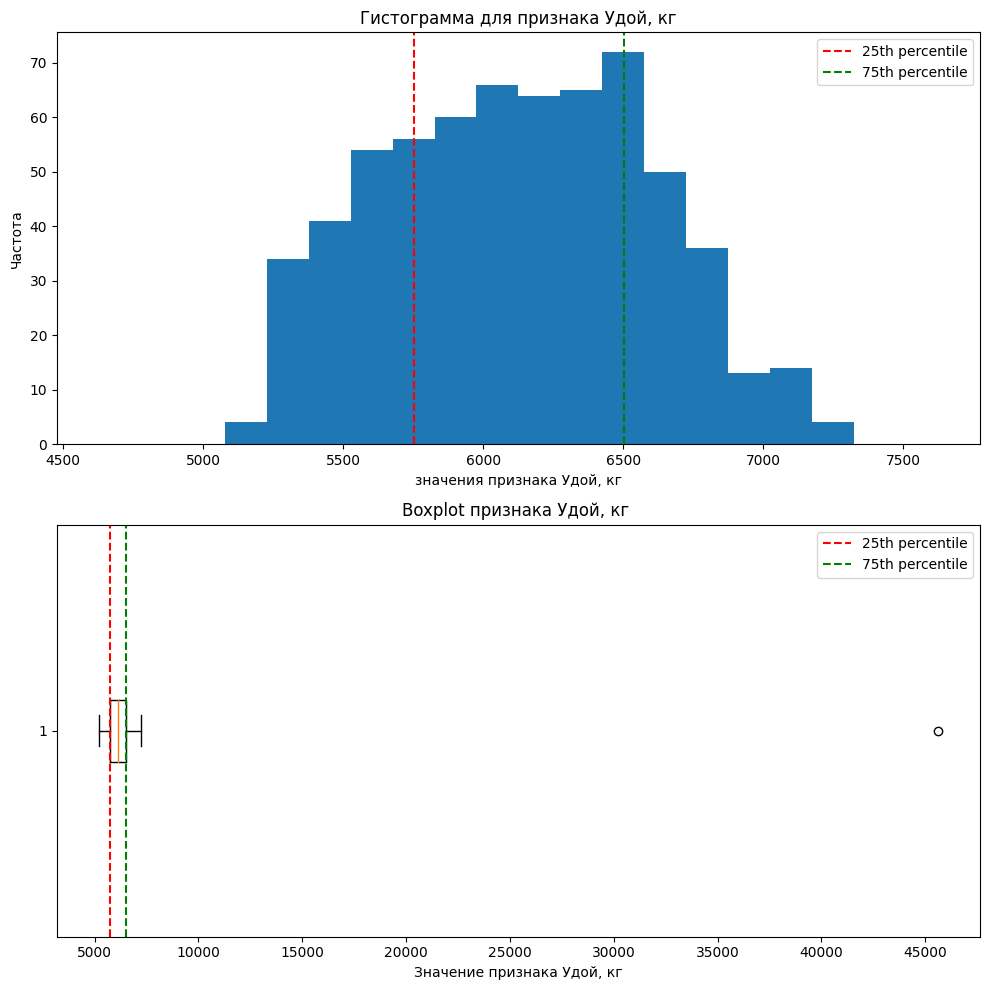

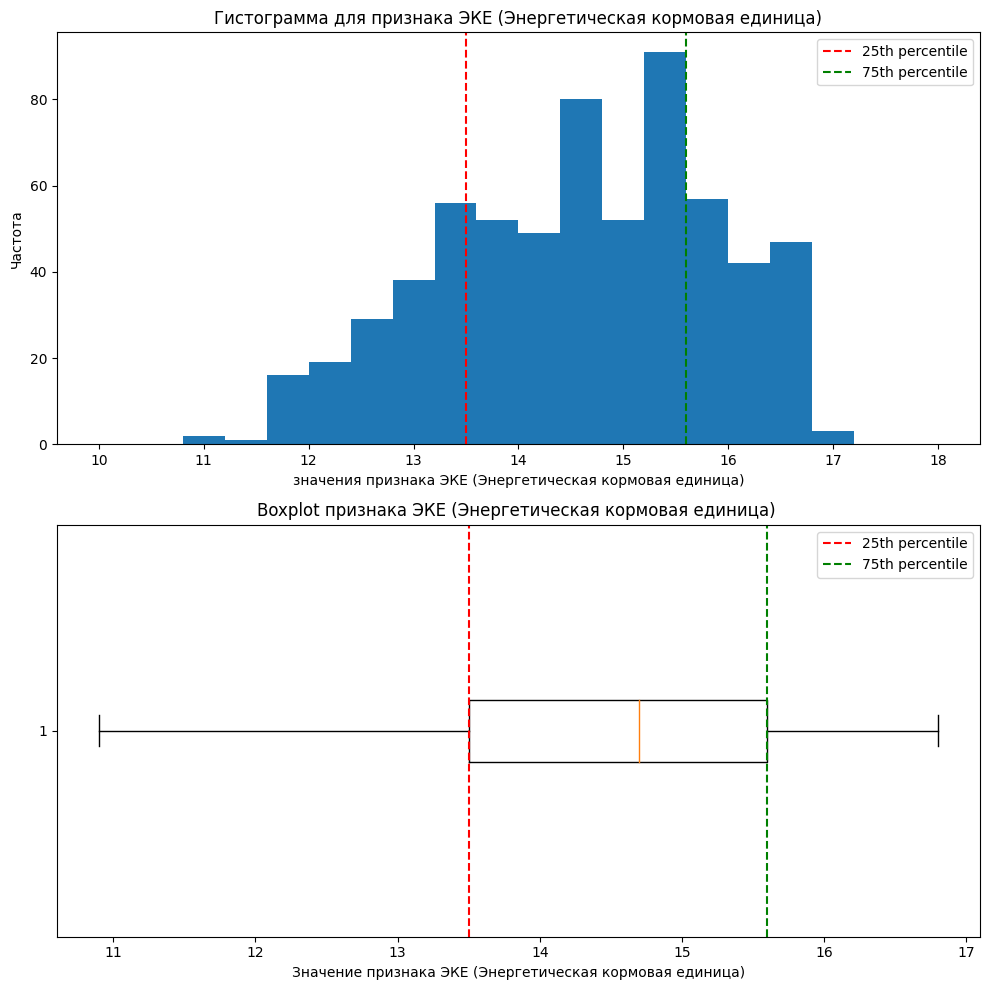

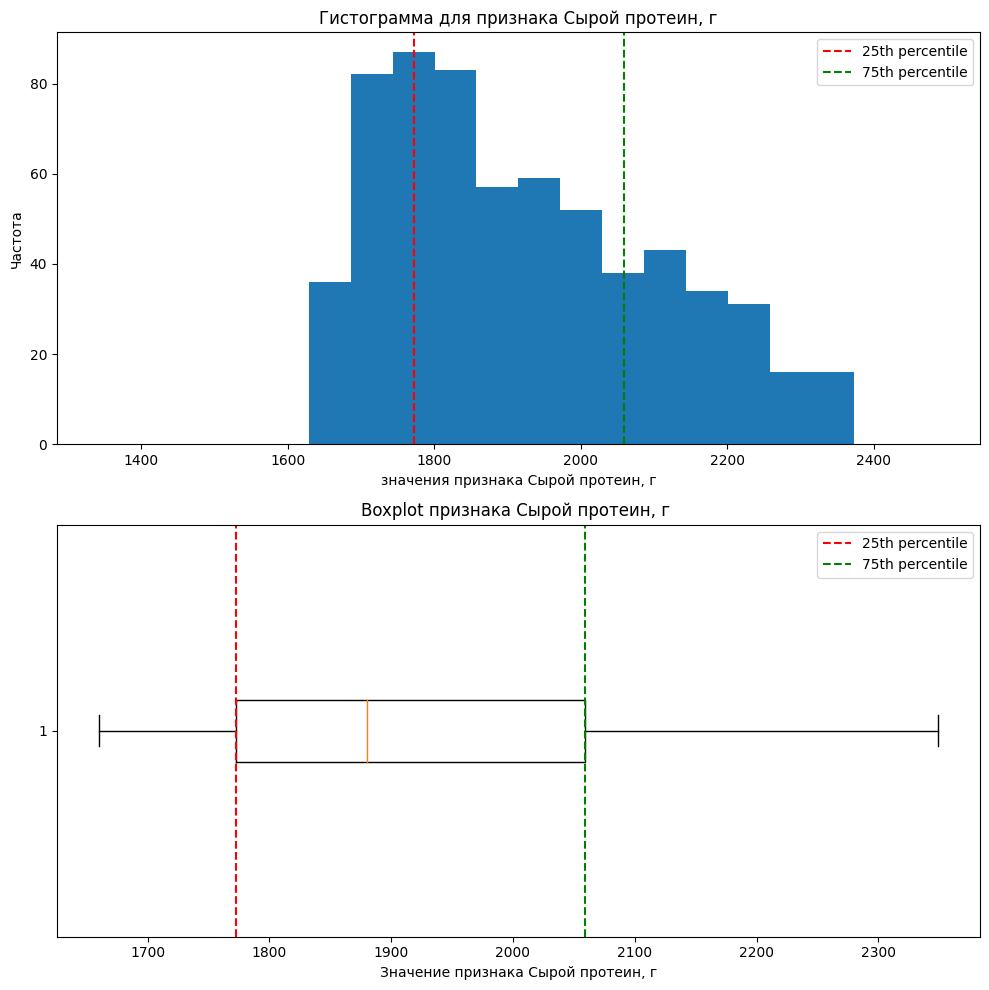

In [42]:


dataset_name= 'Ферма'
for col in numeric_columns:

    df_for_plot= ferma_df[col]

    # Рассчитываем квартили
    q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
    min_val = int(q25- 1.5*(q75-q25))
    max_val= int(q75 +  1.5*(q75-q25))

    # Создаем новый график
    plt.figure(figsize=(10, 10))

    # Строим гистограмму
    plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
    plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
    plt.title(f'Гистограмма для признака {dict_names[col]}')
    plt.xlabel(f'значения признака {dict_names[col]}')
    plt.ylabel(f'Частота')


    # Помечаем квартили на гистограмме
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()

    # Строим график boxplot
    plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
    plt.boxplot(df_for_plot, vert=False)
    plt.title(f'Boxplot признака {dict_names[col]} ')
    plt.xlabel(f'Значение признака {dict_names[col]}')

    # Помечаем квартили на boxplot
    plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
    plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
    plt.legend()


    # Показываем графики
    plt.tight_layout()  # Для автоматического выравнивания графиков
    plt.show()


        


<div class="alert alert-success">
<font size="5">
<b>Комментарий ревьюера</b></font>





Успех:

Верно что для количественных признаков использованы как гистограммы, так и ящика с усами. Здорово Что используешь subplot




<div class="alert alert-warning">


Совет 🤔:



 
- а ещё бы тебе советовал использовать библиотеку    [seaborn](https://nagornyy.me/it/vizualizatsiia-dannykh-v-seaborn/), она строит  симпатичнее и проще matplotlib


- советую написать функцию, смотри сколько однотипного кода.  Ты можешь создать универсальную функцию (к чем и надо стермиться),  которую будешь использовать во всех дальнейших проектах - очень удобно.  Ведь мы во всех проектах  строим графики для категориальных и количественных признаков
    

<div class="alert alert-info"> <b>Комментарии студента:</b> я ее использую периодически, но меня напрягает то, что довольно муторно искать разрозненную информацию о построении графиков. Я бы даже отдельный обучающий курс по построению статистических графиков на знерщт прошел. Можешь что-то порекомендовать?</div>

Графиков гистограмм для датасета Коровы для продажи нет - там остались только дискретные признаки и категориальные признаки

In [43]:
ferma_df.sort_values('milk_yield_kg', ascending=False).head()

id  milk_yield_kg  energy_feed_unity  crude_protein_g  \
16    17          45616               11.5             1675   
70    71           7222               16.8             2157   
135  136           7207               16.6             2343   
296  297           7201               15.8             2077   
294  295           7197               15.6             2241   

     sugar_protein_ratio  cow_is_sovering  pasture_is_hill  bull_is_sovering  \
16                  0.93                0                1                 0   
70                  0.95                0                1                 0   
135                 0.94                0                1                 0   
296                 0.94                1                1                 0   
294                 0.94                1                1                 0   

     milk_fat_percent  percent_protein_in_milk  is_tasty  is_old bull_name  
16               3.22                    3.076         1       1    Буйный  
70               3.70                    3.076         1       1  Геркулес  
135              3.72                    3.078         1       1    Буйный  
296              3.71                    3.072         1       1    Буйный  
294              3.71                    3.075         1       1    Буйный

Что видим по графикам удоя: 

 Удой распределен нормально, однако есть выброс - значение больше 45 000 кг. Явная ошибка. Причем, все показатели по этой корове ниже, чем у остальных - скорее всего, значение удоя меньше в 10 раз. Но значение 4500 тоже будет выбросом - судя по boxplot. Поэтому просто удалим эту строку

In [44]:
ferma_df.drop(index=16, inplace=True)

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Как вариант


Посмотрим на итог

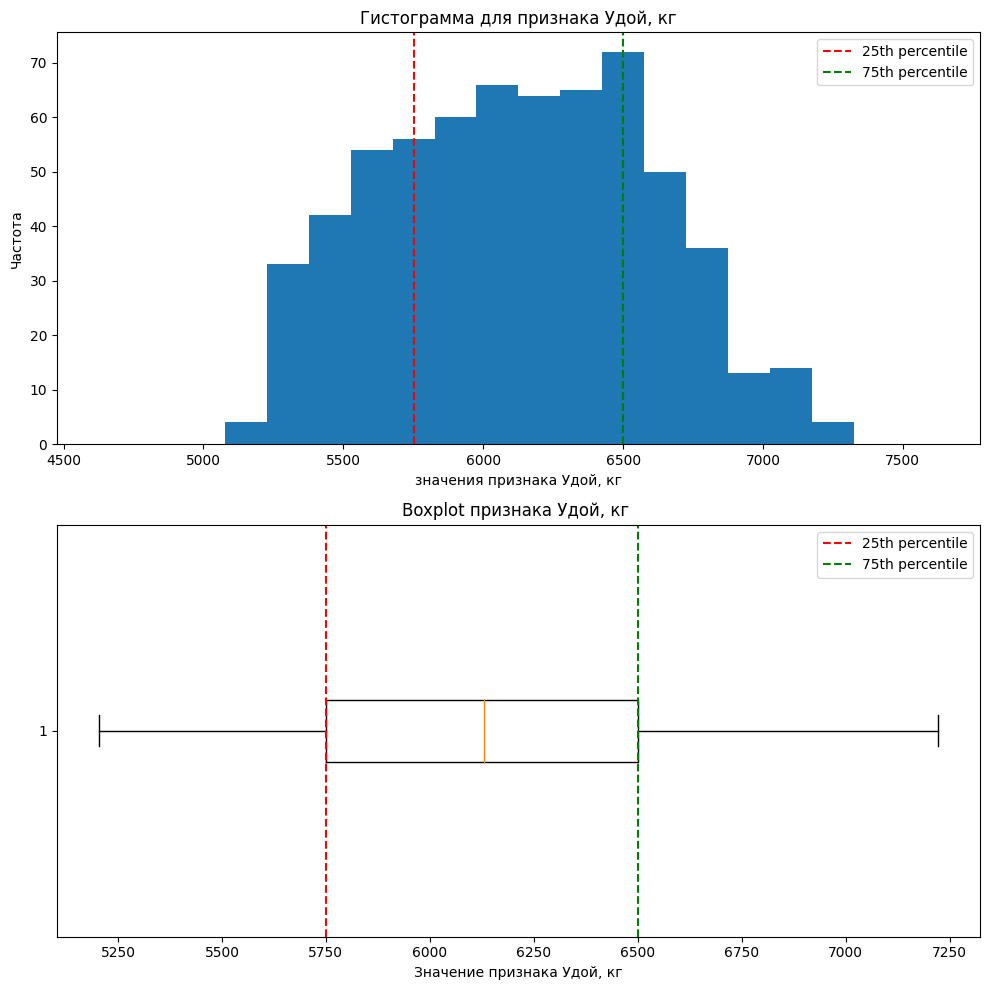

In [45]:


dataset_name= 'Ферма'


df_for_plot= ferma_df.milk_yield_kg
col = 'milk_yield_kg'

# Рассчитываем квартили
q25, q75 = df_for_plot.quantile(0.25), df_for_plot.quantile(0.75)
min_val = int(q25- 1.5*(q75-q25))
max_val= int(q75 +  1.5*(q75-q25))

# Создаем новый график
plt.figure(figsize=(10, 10))

# Строим гистограмму
plt.subplot(2, 1, 1)  # 2 строки, 1 столбец, график 1
plt.hist(df_for_plot, bins=20, range=(min_val, max_val))
plt.title(f'Гистограмма для признака {dict_names[col]}')
plt.xlabel(f'значения признака {dict_names[col]}')
plt.ylabel(f'Частота')


# Помечаем квартили на гистограмме
plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
plt.legend()

# Строим график boxplot
plt.subplot(2, 1, 2)  # 2 строки, 1 столбец, график 2
plt.boxplot(df_for_plot, vert=False)
plt.title(f'Boxplot признака {dict_names[col]} ')
plt.xlabel(f'Значение признака {dict_names[col]}')

# Помечаем квартили на boxplot
plt.axvline(q25, color='r', linestyle='--', label='25th percentile')
plt.axvline(q75, color='g', linestyle='--', label='75th percentile')
plt.legend()


# Показываем графики
plt.tight_layout()  # Для автоматического выравнивания графиков
plt.show()


    

**Выводы по графикам непрерывных признаков: (есть только у данных по Ферме)**

1) Удой: <font color='red'> этот показатель предстоит предсказать для коров на продажу</font> 
    - распределен нормально
    - обнаружен выброс - ошибка в данных - удален
    - половина значений лежит в диапазоне от 5750 до 6500 кг в год

Значит при прогнозировании удоя для коров, которых собираемся купить, мы стремимся попасть в этот диапазон




2) Энергетическая кормовая единица (показатель питательности корма коровы)
    - распределение похоже на нормально с небольшим смещением вправо и бимодальностью на значениях 14.5 и 15.5
    - не имеет выбросов
    - половина всех значений лежит в диапазоне от 13.5 до 15.7


3) Сырой протеин:
    - распределение похоже на нормальное со смещением влево
    - не имеет выбросов
    - половина всех значений лежит в диапазоне от 1780 г до 2070 г


##### 3.2.2 Графики для категориальных и дискретных признаков

Графики категориальных и дискретных признаков для датасета Ферма


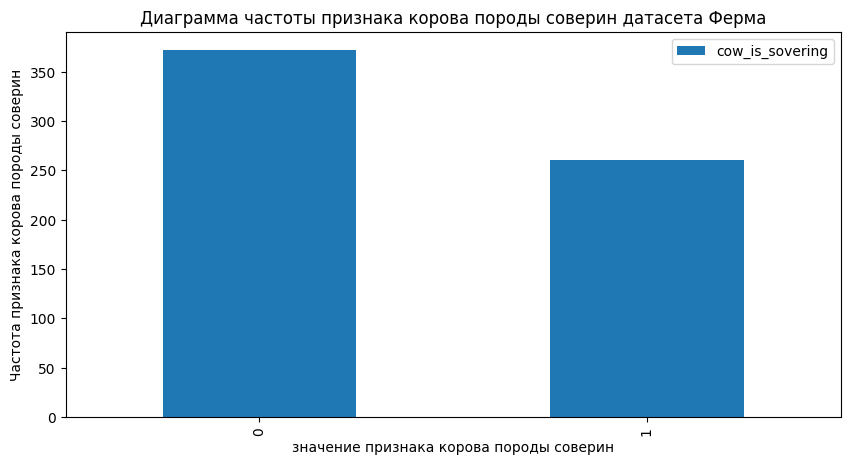

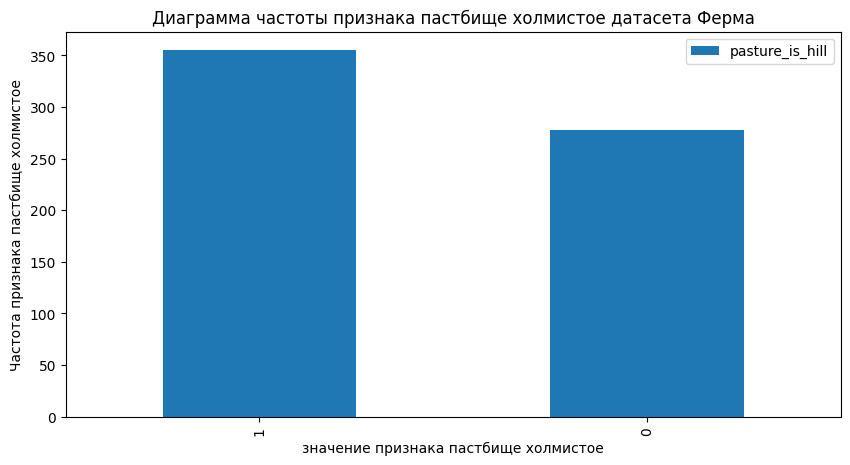

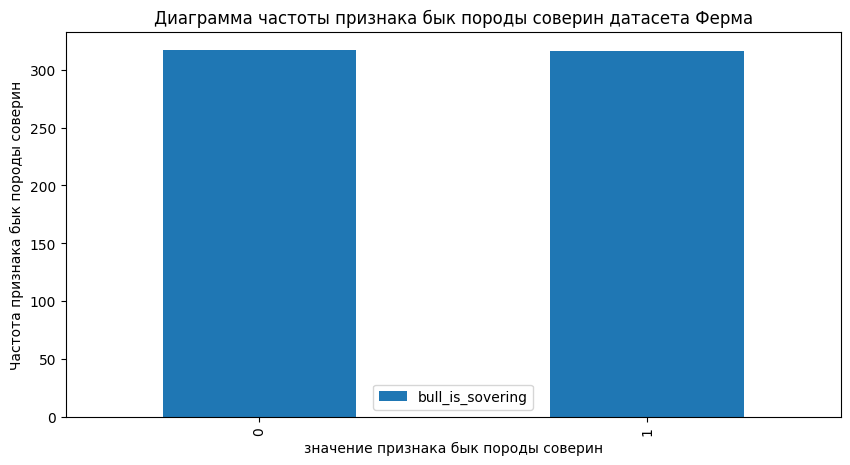

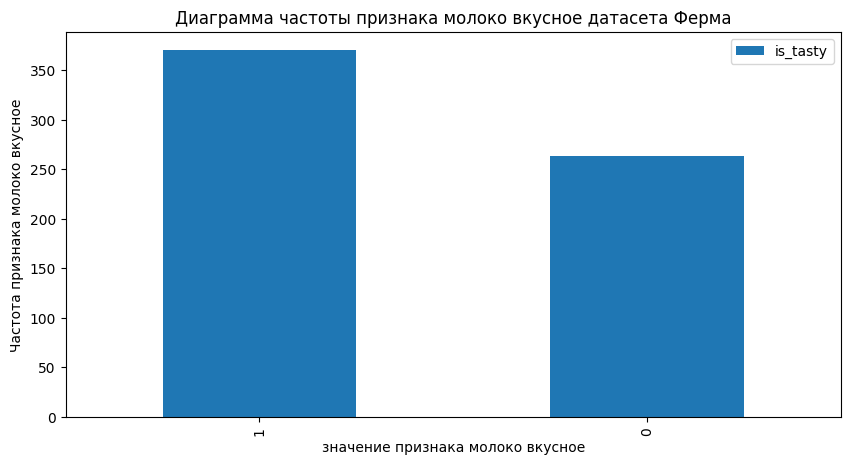

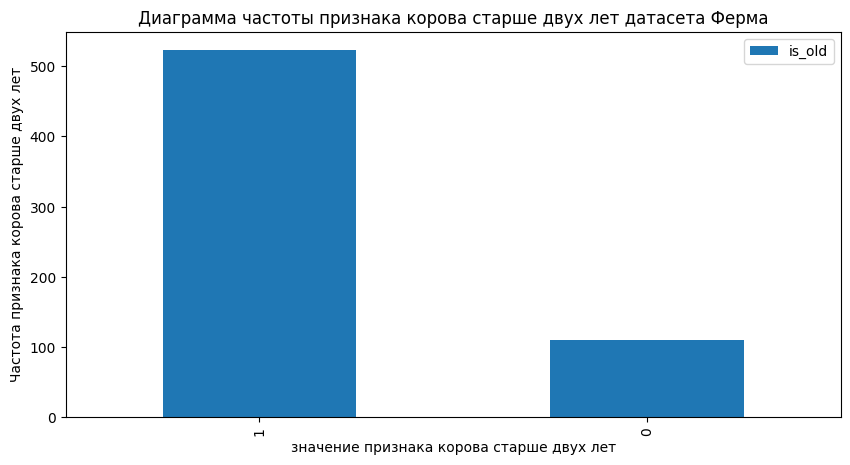

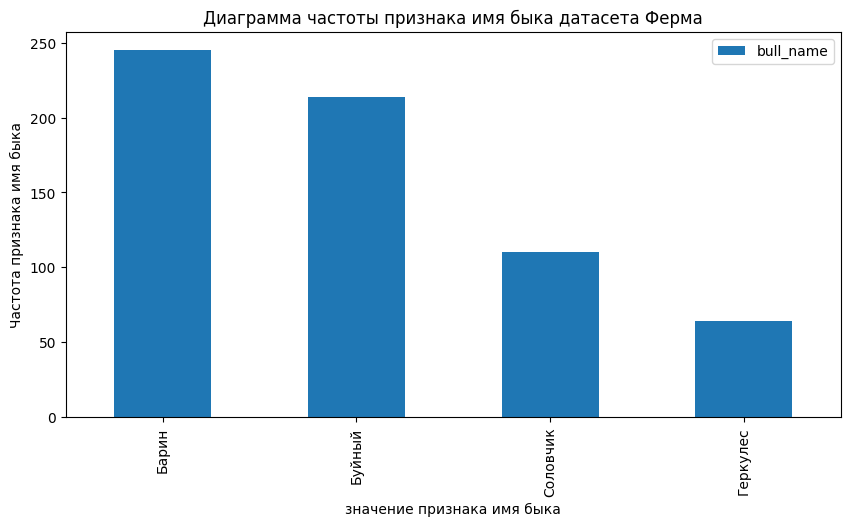

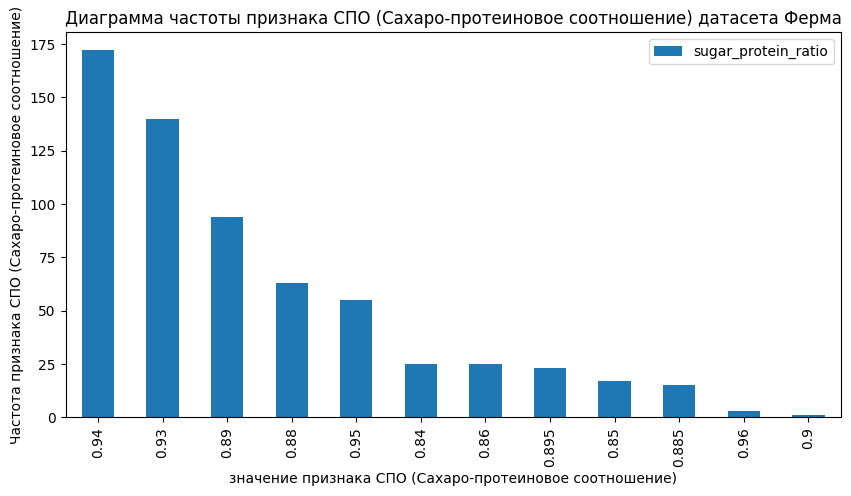

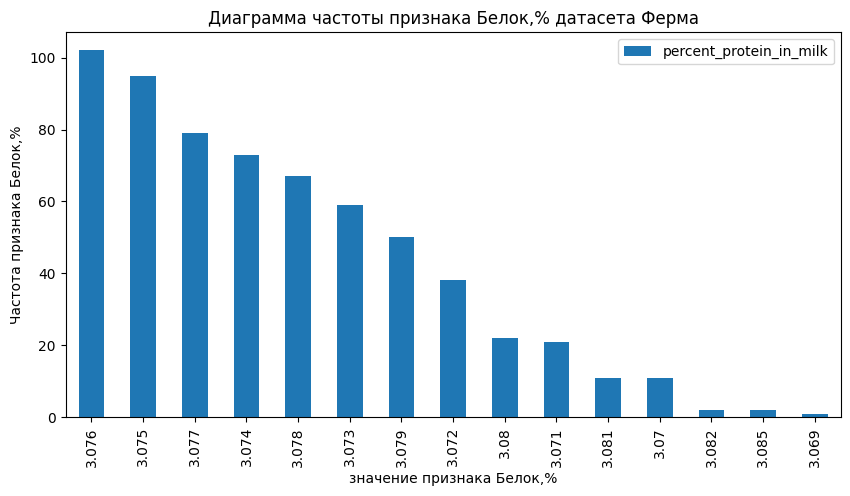

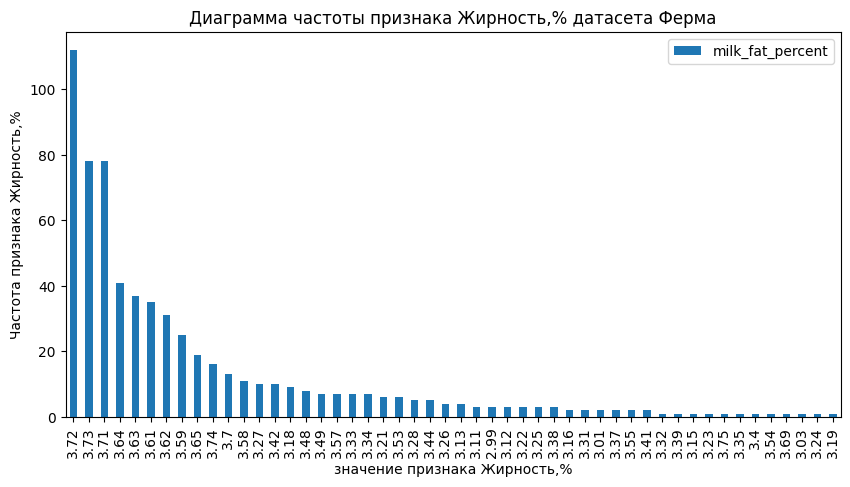

Графики категориальных и дискретных признаков для датасета Коровы для продажи


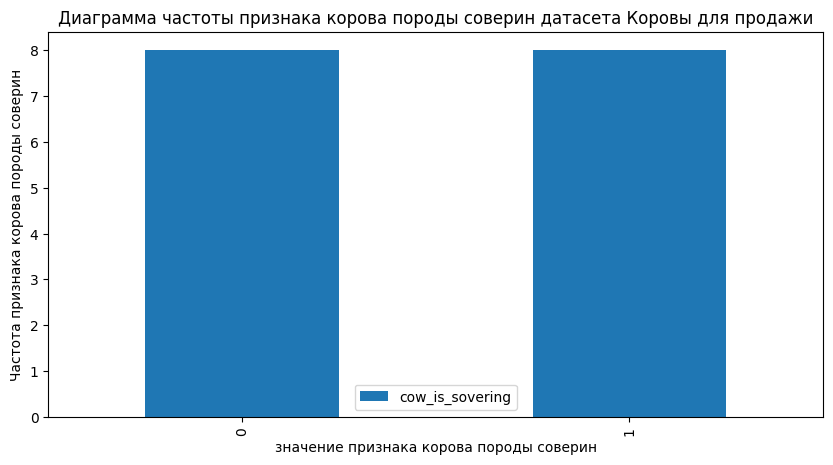

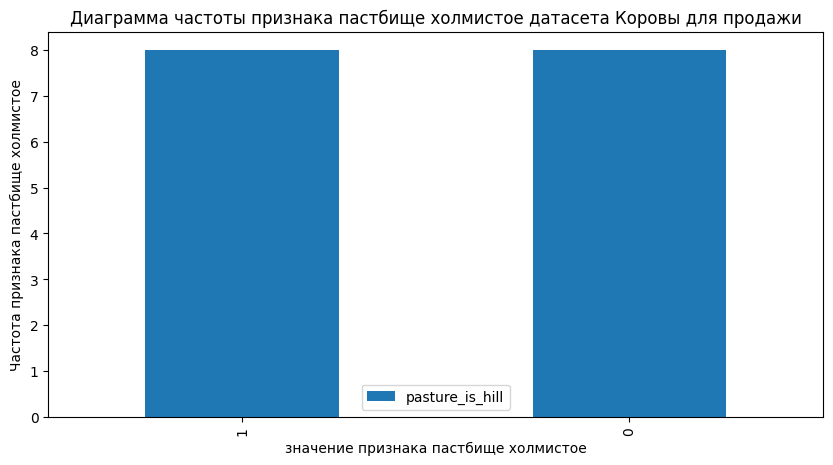

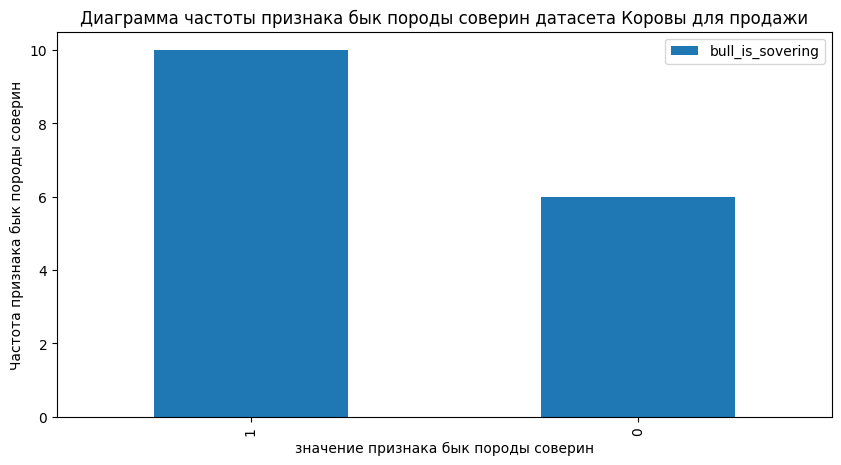

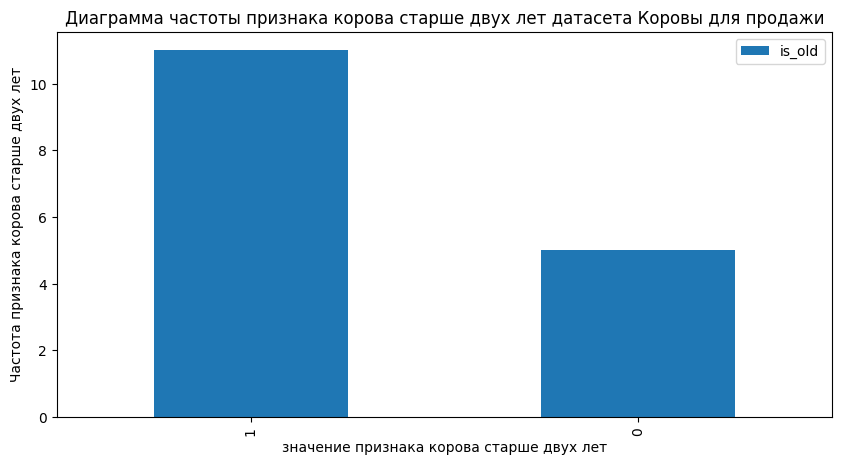

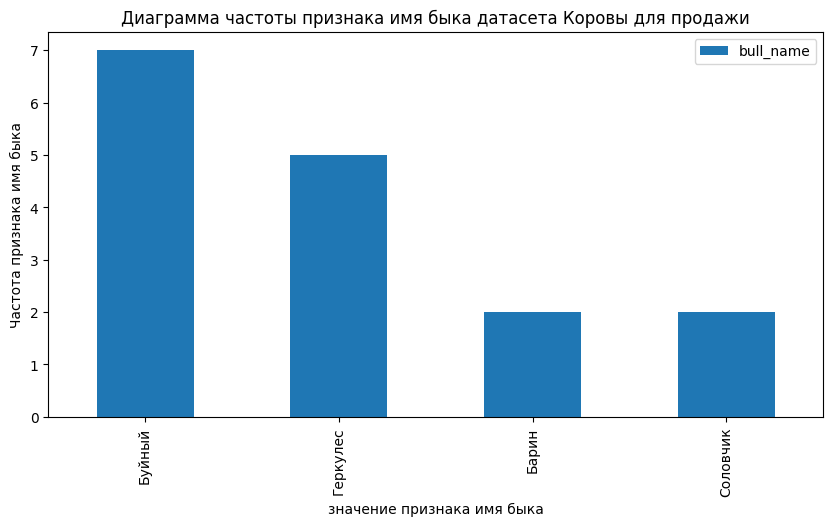

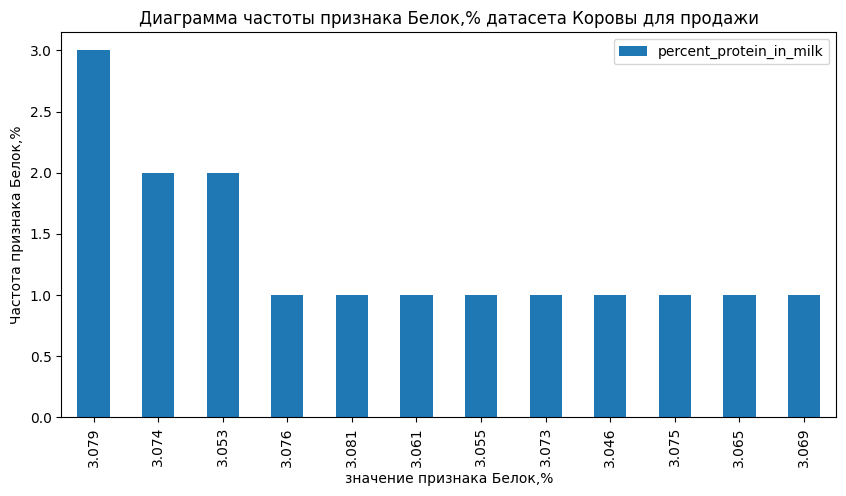

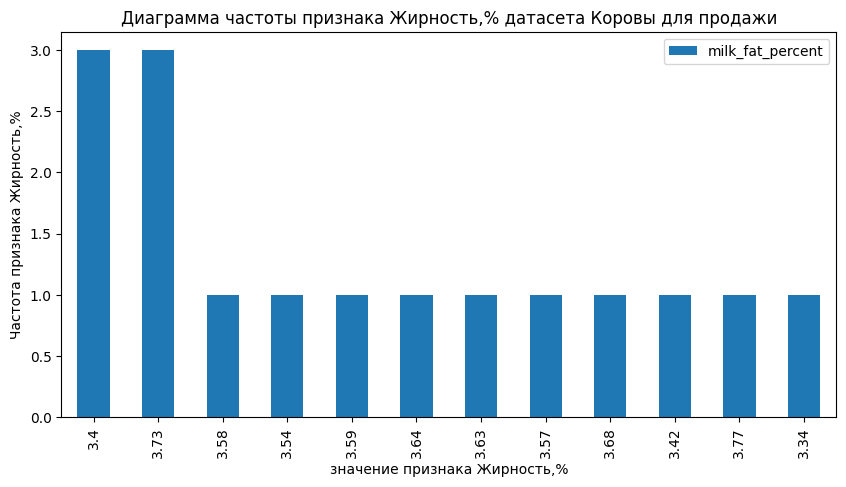

In [46]:

for ind in range(2):
    dataset = (ferma_df, cow_buy_df)[ind]
    dataset_name= ('Ферма', 'Коровы для продажи')[ind]
    
    print(f'Графики категориальных и дискретных признаков для датасета {dataset_name}')
    for col in categorical_columns + discrete_columns:
        try:
            dataset[col].value_counts().plot(kind='bar', legend=True, figsize=(10,5))
            plt.title(f'Диаграмма частоты признака {dict_names[col]} датасета {dataset_name}')
            plt.xlabel(f'значение признака {dict_names[col]}')
            plt.ylabel(f'Частота признака {dict_names[col]}')
            plt.show()
            
        except KeyError:
            continue

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:




Спо, жирность явно есть упорядочность в данных, а ты их построил так как будто это категориальные признаки, посчитав в количество для каждого значения. И непонятно что тогда у нас распределением.
    
Достаточно было разбить признаки на категориальные и количественные, построив соответствующий график для каждого, в чём смысл выделения дискретных непонятно. 

**Выводы по графикам категориальных признаков:**


1) Порода коров: 
    - на ферме преобладают коровы породы Айдиал
    - на продажу предлагается 8 коров Соверин и 8 коров Айдиал

2) Тип пастбища:
    - коровы на ферме в основном пасутся на холмистых пастбищах
    - коровы на продажу: 8 на холмистых, 8 - на равнивнных 

3) Порода быков:
    - коровы на ферме имеют примерно одинаковое соотношение отцов-соверинов и отцов-айдиалов
    - коровы на продажу: у 10 отцы - соверины, у 6 - айдиалы

4) Вкус молока:
    - у коров на ферме в основном вкусное молоко (примерно 60/40 в пользу вкусного молока)
    - у коров на продажу: <font color='red'>предстоит предсказать</font> 

5) Возраст коров:
    - на ферме подавляющее большинство коров старше 2 лет (примерно 85/15)
    - на продажу 11 коров старше 2 лет, и 5 - младше

6) Сахаро-протеиновое соотношение в корме коровы:
    - на ферме чаще всего встречаются значения 0.94, 0.93 , 0.89, 0.88. Остальные намного реже
    - у коров на продажу этот показатель отсутствует

7) Процент белка в молоке:
    - у коров на ферме чаще всего от 3.072 до 3.079. Самое частое значение - 3.076 (более, чем у 100 коров)
    - у коров на продажу: 20% с хорошим показателем белка (3 коровы - 3.079), остальные - от 3.05 до 3.08

8) Жирность молока:
    - у коров на ферме: около 40% выдают жирность 3.71-3.73%, меньше 30% коров - около 3.6%, остальные - в диапазоне 3-3.5%  
    - у коров на продажу разнообразнее: 3 коровы с высоким показателем 3.73, 3 коровы с низким - 3.4. Остальные дают молоко с жирностью в этом диапазоне

9) Имя быка:
    - у коров на ферме самые частые отцы - Барин и Буйный (75% коров), у остальных - Соловчик и Геркулес (25%)
    - у коров на продажу - самый частый отец Буйный (7 коров), потом Геркулес (5 коров), у 4 - Барин и Соловчик


### Шаг 4. Корреляционный анализ признаков в датасете 

In [84]:
ferma_df.head()

id  milk_yield_kg  energy_feed_unity  crude_protein_g  sugar_protein_ratio  \
0   1           5863               14.2             1743                0.890   
1   2           5529               12.8             2138                0.890   
2   3           5810               14.0             1854                0.885   
3   4           5895               12.4             2012                0.885   
4   5           5302               12.8             1675                0.885   

   cow_is_sovering  pasture_is_hill  bull_is_sovering  milk_fat_percent  \
0                0                0                 0              3.58   
1                0                0                 1              3.54   
2                1                1                 1              3.59   
3                1                1                 0              3.40   
4                0                0                 1              3.73   

   percent_protein_in_milk  is_tasty  is_old bull_name  
0                    3.076         1       1    Буйный  
1                    3.079         1       0  Соловчик  
2                    3.074         0       1     Барин  
3                    3.075         0       1    Буйный  
4                    3.073         1       0     Барин

In [85]:
numeric_columns

['milk_yield_kg', 'energy_feed_unity', 'crude_protein_g']

In [86]:
discrete_columns

['sugar_protein_ratio', 'percent_protein_in_milk', 'milk_fat_percent']

#### 4.1 Коэффицициенты корреляции Пирсона для числовых значений

In [87]:
ferma_df[numeric_columns+discrete_columns].corr()

milk_yield_kg  energy_feed_unity  crude_protein_g  \
milk_yield_kg                 1.000000           0.765098         0.446731   
energy_feed_unity             0.765098           1.000000         0.387875   
crude_protein_g               0.446731           0.387875         1.000000   
sugar_protein_ratio           0.806339           0.749007         0.446332   
percent_protein_in_milk       0.002966          -0.008939         0.226802   
milk_fat_percent              0.600902           0.637279         0.357793   

                         sugar_protein_ratio  percent_protein_in_milk  \
milk_yield_kg                       0.806339                 0.002966   
energy_feed_unity                   0.749007                -0.008939   
crude_protein_g                     0.446332                 0.226802   
sugar_protein_ratio                 1.000000                 0.073718   
percent_protein_in_milk             0.073718                 1.000000   
milk_fat_percent                    0.629098                -0.026542   

                         milk_fat_percent  
milk_yield_kg                    0.600902  
energy_feed_unity                0.637279  
crude_protein_g                  0.357793  
sugar_protein_ratio              0.629098  
percent_protein_in_milk         -0.026542  
milk_fat_percent                 1.000000

Построим тепловую карту корреляции числовых признаков Фермы

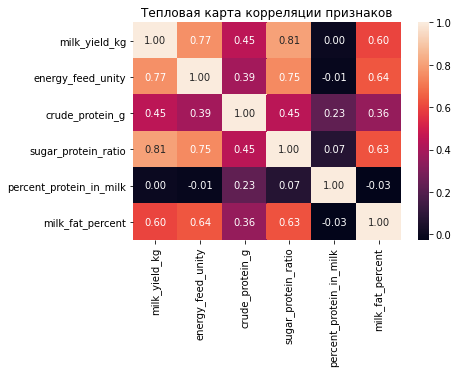

In [88]:
ax = plt.axes()
sns.heatmap(ferma_df[numeric_columns+discrete_columns].corr(), annot=True, fmt='.2f', ax=ax)

ax.set_title('Тепловая карта корреляции признаков')
plt.show()



<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:


    

   

У нас же не все  признаки имеют нормальное распределение, а  Пирсона (по умолчанию в .corr  считается именно он) мы используем в случае нормальности распределения данных, ведь этот коэффициент чувствителен к отклонениям от нормальности (и к выбросам кстати). В случаи ненормальности в распредлении используем Спирмена       



<div class="alert alert-warning">


Совет: 


- можно поменять политру для удобства восприятия, через добавление cmap='coolwarm' ('bwr', 'seismic'), тогда чем ближе корреляция к 1 тем красней, чем ближе к -1 тем "синей" , ну и чем меньше связи, чем ближе к 0, тем нейтальней цвет


Вывод по корреляции числовых признаков: 
1) Удой неплохо коррелирует со всеми признаками, кроме содержания белка в молоке

2) Процент содержания белка: 
    - немного коррелирует с содержанием белка в корме 
    - но больше ни с чем

3) Жирность молока:
    - неплохо коррелирует с ЭКЕ и сахаро-протеиновым соотношением
    - похуже - с содержанием белка в корме
    - и никак - с содержанием белка в молоке

это нормально - очень важно, чем ты кормишь корову

4) ЭКЕ:
    - неплохо коррелирует с сахаро-белковым соотношением и жирностью молока, 
    - чуть хуже с содержанием протеина в корме 
    - и никак - с содержанием белка в молоке

5) показатели по корму в целом коррелируют между собой 



#### 4.2 Диаграммы рассеяния для признака Удой и всех количественных признаков с учётом значения категориальных признаков

In [89]:
ferma_df.columns

Index(['id', 'milk_yield_kg', 'energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_tasty', 'is_old', 'bull_name'],
      dtype='object')

In [90]:
numeric_columns+discrete_columns

['milk_yield_kg',
 'energy_feed_unity',
 'crude_protein_g',
 'sugar_protein_ratio',
 'percent_protein_in_milk',
 'milk_fat_percent']

In [91]:
categorical_columns

['cow_is_sovering',
 'pasture_is_hill',
 'bull_is_sovering',
 'is_tasty',
 'is_old',
 'bull_name']

In [92]:
dict_names

{'milk_yield_kg': 'Удой, кг',
 'energy_feed_unity': 'ЭКЕ (Энергетическая кормовая единица)',
 'crude_protein_g': 'Сырой протеин, г',
 'sugar_protein_ratio': 'СПО (Сахаро-протеиновое соотношение)',
 'cow_is_sovering': 'корова породы соверин',
 'bull_is_sovering': 'бык породы соверин',
 'pasture_is_hill': 'пастбище холмистое',
 'milk_fat_percent': 'Жирность,%',
 'percent_protein_in_milk': 'Белок,%',
 'is_tasty': 'молоко вкусное',
 'is_old': 'корова старше двух лет',
 'bull_name': 'имя быка'}

Строим графики рассеяния Удоя относительно численных признаков с учетом разных значений категориальных признаков

Создадим функцию построения графиков

In [93]:
def plot_scatter_for_df(some_df,num_feat, cat_feat, target_feature='milk_yield_kg'):

    # забираем истинные имена признаков
    num_feature_name = dict_names[num_feat]
    cat_feat_name = dict_names[cat_feat]

    # Создаем scatter-plot с линиями тренда для каждой группы точек
    fig = px.scatter(some_df, x=num_feat, y=target_feature, color=cat_feat,
                    color_discrete_map={0: 'blue', 1: 'yellow'},
                    title= f'График рассеяния Удоя по {num_feature_name} с учетом признака "{cat_feat_name}"',
                    labels= {num_feat: num_feature_name, target_feature: 'Удой, кг'},
                    )

    # Фильтруем данные для каждой группы точек
    data_yellow = some_df[some_df[cat_feat] == 1]
    data_blue = some_df[some_df[cat_feat] == 0]

    # Добавляем линию тренда для красных точек
    fig.add_trace(px.scatter(data_yellow, 
                            x=num_feat, 
                            y=target_feature, 
                            trendline='ols',
                            trendline_color_override= 'orange',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для синих точек
    fig.add_trace(px.scatter(data_blue, 
                            x=num_feat, 
                            y=target_feature, 
                            trendline='ols',
                            trendline_color_override= 'blue',
                            color_continuous_scale=False).data[1])


    # Добавляем описание легенды
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='yellow'), 
                             showlegend=True, name=f'{cat_feat_name} = да'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='blue'), 
                             showlegend=True, name=f'{cat_feat_name} = нет'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='orange'), 
                             showlegend=True, name=f'линия тренда для {cat_feat_name}=да'))
    
    fig.add_trace(go.Scatter(x=[None], y=[None], mode='lines', marker=dict(color='blue'), 
                             showlegend=True, name=f'линия тренда для {cat_feat_name}=нет'))

    # Перемещаем легенду над графиком
    fig.update_layout(legend=dict(yanchor="top", y=0.99, xanchor="left", x=0.01))

    # Показываем график
    fig.show()


In [94]:
# напишем отдельную функцию для признака "Имя быка" - у него 4 значения

def plot_scatter_for_df_2(some_df,num_feat, cat_feat, target_feature='milk_yield_kg'):

    # забираем истинные имена признаков
    num_feature_name = dict_names[num_feat]
    cat_feat_name = dict_names[cat_feat]    

    # Создаем scatter-plot с линиями тренда для каждой группы точек
    fig = px.scatter(some_df, x=num_feat, y=target_feature, color=cat_feat,
                    title= f'График рассеяния Удоя по {num_feature_name} с учетом признака {cat_feat_name}',
                    labels= {'num_feat': num_feature_name,'milk_yield_kg': 'Удой, кг'},
                    )

    # Фильтруем данные для каждой группы точек
    data_red = ferma_df[ferma_df['bull_name'] == 'Соловчик']
    data_blue = ferma_df[ferma_df['bull_name'] == 'Буйный']
    data_green = ferma_df[ferma_df['bull_name'] == 'Барин']
    data_violet = ferma_df[ferma_df['bull_name'] == 'Геркулес']


    # Добавляем линию тренда для красных точек
    fig.add_trace(px.scatter(data_red, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'red',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для синих точек
    fig.add_trace(px.scatter(data_blue, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'blue',
                            color_continuous_scale=False).data[1])

    # Добавляем линию тренда для зеленых точек
    fig.add_trace(px.scatter(data_green, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'green',
                            #color_continuous_scale=False
                            ).data[1])

    # Добавляем линию тренда для фиолетовых точек
    fig.add_trace(px.scatter(data_violet, 
                            x=num_feat, 
                            y='milk_yield_kg', 
                            trendline='ols',
                            trendline_color_override= 'violet',
                            #color_continuous_scale=False
                            ).data[1])

    # Показываем график
    fig.show()


Запускаем цикл построения графиков

In [95]:
for col_1 in numeric_columns+discrete_columns:  # цикл по числовым признакам
    if col_1 == 'milk_yield_kg': continue       # диаграмма рассеяния бессмысленна для зависимости удоя от удоя
    
    for col_2 in categorical_columns:           # цикл по категориальным признакам
        if col_2=='bull_name':
            plot_scatter_for_df_2(some_df= ferma_df, 
                            num_feat=col_1, 
                            cat_feat=col_2,
                            target_feature='milk_yield_kg')

        else: 
            plot_scatter_for_df(some_df= ferma_df, 
                            num_feat=col_1, 
                            cat_feat=col_2,
                            target_feature='milk_yield_kg')

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:





- здорово что построен    scatter plot в разбивке по категориальным признакам 

- здорово что добавил линии тренда, но почему бы не  посчитать насколько хорошо эти прямые описывают точки

<div class="alert alert-warning">


Совет: 



- как можно упростить построение графиков типа scatter?  Можно воспользоваться [sns.PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).  Он буквально двумя строчками строит scater_plot с разбивкой по категориальным признакам (hue - указываем категориальный признак по которому мы хотим сделать дополнителное разбиение,     facor - список количественных признаков, targ - целевая количественная переменная, cat - Список категориальных признаков)
    
    
            for category in cat:
                g = sns.PairGrid(df, hue = category, x_vars=factor, y_vars=targ)





**Вывод по корреляции удоя с числовыми признаками с учетом категориальных признаков:**

1) ЭКЕ корма коровы
    - линейная корреляция  <font color='red'>вне зависимости</font> от породы коровы, типа пастбища, вкусности молока, имени быка
    - линейная корреляция с учетом породы быка, однако корреляция немного выше для коров, чьи отцы - породы Айдиал
    - линейная корреляция для коров старше 2 лет, однако очень низкая для коров младше 2 лет (молодые буренки доятся хорошо и без высокого значения корма)

2) Сырой протеин в корме коровы
    - линейная корреляция  <font color='red'>вне зависимости</font> от породы коровы, типа пастбища, породы быка, вкусности молока, имени быка
    - линейная корреляция для коров старше 2 лет, однако очень низкая для коров младше 2 лет (молодые буренки доятся хорошо и без высокого значения корма)

3) Сахаро-протеиновое соотношение в корме коровы: данные дискретны, сложно назвать такое соотношение линейным, однако зависимости от категориальных признаков аналогичны - для коров младше 2 лет влиняния на удой нет

4) Содержание белка в молоке - графики подтверждают отсутствие корреляции

5) Жирность молока - типы корреляции аналогичны корреляции удоя с ЭКЕ по различным категориальным признакам

#### 4.3 Общие выводы по корреляции


1) В основном наблюдается линейная корреляция между Удоем (целевой показатель) и численными признаками. Иключение: содержание белка в молоке (практически полное отсутствие корреляции)

2) Величина корреляции практически не зависит от категориальных показателей, однако очень низкая для молодых коров - они доятся одинаково вне зависимости от составляющих корма

3) Возможно, есть нелинейная связь между Удоем и содержанием белка в молоке, хотя вряд ли: белок в молоке коррелирует с белком в корме. Вводить дополнительные признаки не требуется 

4) Показатели по корму (ЭКЕ, содержание протеина, сахаро-протеиновое соотношение) коррелируют между собой, особенно ЭКЕ и СПС (значение к-та Пирсона = 0.75). Однако, мультиколлинеарными считаются признаки с корреляцией от 0.9. Поэтому удалять эти признаки не будем

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:




- сделаны выводы относительно нелинейных связей между таргетом "удой" и некоторыми количественными признаками. на основе этой информации мы и сделаем ниже преобразования наших признаков, учитывая выявленные особенности



- хорошо заметил по поводу того что "сколько молодых коров не корми ничего не меняется" 



- есть проверка на мультколлинеарность


<div class="alert alert-warning">


Совет: 




- чтобы убедиться что соотношение между удоем и ЭКО в квадрате лучше описывается прямой, можно построить scatter plot для  эке в квадрате и наложить прямую регрессию с вычислением r2 



### Шаг 5. Линейная Регрессия 

#### 5.1 Первая модель до настройки

##### 5.1.1 Выбор признаков для прогнозирования

Целевой признак - Удой (молока в кг)

Входные признаки для прогнозирования:
1) Показатели корма
    - ЭКЕ (energy_feed_unity)
    - содержание протеина (crude_protein_g)
    - СПО (sugar_protein_ratio)
2) Порода
    - коровы (cow_is_sovering)
    - быка (bull_is_sovering)
3) Отец коровы
    - имя быка (bull_name)

4) Тип пастбища (pasture_is_hill)
5) Возраст коровы (is_old)


Показатели вкуса молока, содержания белка и жирность использовать не будем - они никак не влияют на величину удоя

In [96]:
y=ferma_df.milk_yield_kg
X= ferma_df[['energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'is_old', 'bull_name']]


##### 5.1.2 Разобьем данные на тренировочную и тестовую выборки

In [97]:
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    random_state=RANDOM_STATE
)

##### 5.1.3 Кодируем категориальные признаки

У нас остался только один некодированный признак - имя быка

In [98]:

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(sparse=False, drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[['bull_name']])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names_out'

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

- Вылетает ошибка     
    
    AttributeError: 'OneHotEncoder' object has no attribute 'get_feature_names_out'

    
Тут тебе нужно проследить за версиями библиотек (Попробуй добавить !pip install -U scikit-learn)    
    
    

- Вот тут мы подходим к тому что не нужно было предобрабатывать данные.  Вот тут бы мы все наши категориальные данные могли бы засунуть в OneHotEncoder, без предварительного ручного кодирования. Предлагаю использовать однотипный подход ко всем категориальным признакам

In [ ]:
X_test_ohe.head()

In [ ]:
X_train_ohe.head()

##### 5.1.4 Кодируем количественные признаки

In [ ]:
num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio']

# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем масштабированные данные с именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)

In [ ]:
X_train_scaled.head()

In [ ]:
X_test_scaled.head()

##### 5.1.5 сшиваем все вместе

In [ ]:
X_train.head()

In [ ]:
X_train.columns

In [ ]:
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)

X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)

In [ ]:
X_train_non_encoded.head()

In [ ]:
X_test_non_encoded.head()

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Очень громоздкая подготовка данных получилась


сшиваем воедино

In [ ]:
X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
X_train.head()

In [ ]:
X_train.columns

In [ ]:
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

In [ ]:
X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
y_train

In [ ]:
y_test

Построим гистограмму и boxplot для количественных данных - чтобу убедиться в корректности масштабирования

In [ ]:
X_train.columns

In [ ]:
num_col_names =['energy_feed_unity','crude_protein_g', 'sugar_protein_ratio']

In [ ]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [ ]:
X_train[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

In [ ]:
# постройте графики по количественным признакам тестового датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_test[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_test[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [ ]:
X_test[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

Значения среднего приведены к нулю, значения стандартного отклонения - к единице

Данные готовы.

##### 5.1.5 Обучаем первую модель линейной регрессии

In [ ]:
# инициализируйте модель линейной регрессии
model_lr  = LinearRegression()

# обучите модель на тренировочных данных
model_lr.fit(X_train, y_train)

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions = model_lr.predict(X_test)

# посчитайте среднюю абсолютную ошибку на тестовых данных и выведите её на экран
mae = mean_absolute_error(y_test, predictions)
print(f'MAE = {mae:.0f}')



<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

 Совет:

    
Чтобы сделать код компактнее можно  оформить дополнительную функцию. Как видишь в этом проекте мы не делаем перебора гиперпараметров, и не используем разные модели, так почему бы не создать функцию, которая будет принимать разный набор признаков, а дальше делать одно и то же (сплит, шкалирование + OHE, обучение модели, прогноз модели). Вместо того чтобы три раза писать простыню из кода, мы напишем простыню один раз, а затем три раза применим функцию одной строкой (кстати советую в return кроме модели добавить вывод Scaler и Encoder, ведь они нам понадобятся для того чтобы сделать transform на данных из cow_buy) . В проектах где будет перебор гиперпараметров и мы будем использовать разные модели, в такой функции необходимости не будет, но в этом проекте, я думаю мы здорово улучшим восприятие кода
    
И парочку cоветов по оформлению функций:    
    
- Для таких простых функций острой необходимости нет, код говорит сам за себя, но если хочешь попрактиковаться, можешь включить строку документации [docstring](https://dzen.ru/a/Yw02qy-7BGdhFhN3?utm_referer=yandex.ru).  Можно оставить описание того что делает эта функция, а затем попробовать вызвать что та напишешь с помощью
    
    
    print(my_function.__doc__)
    
или    
    
    help(my_function)


- Код создания функции обычно оставляет под импортами, так их легче контролировать



Считаем коэффициент детерминации R2

In [ ]:
r2 = r2_score(y_test, predictions) 
r2

Итого видим, что:
- средняя ошибка модели по модулю составляет 156кг удоя в год
- точность модели - 80% (модель ошибается 1 раз из 5 наблюдений)

Посчитаем остатки и проанализируем их

In [ ]:
residuals = y_test - predictions

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(residuals, bins=20)
axes[0].axvline(residuals.mean(), color='r', linestyle='--', label='Смещенное среднее \n остатков')
axes[0].legend(loc='upper left')
axes[0].set_title('Гистограмма распределения остатков')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions, residuals)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки')
axes[1].set_title('Анализ дисперсии')
plt.show()

Судя по графикам, модель завышает значения удоя, тем самым вводя в заблуждение.

Причем, дисперсия остатков не выглядит постоянной.




    
    
<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:

    
    
- есть графический анализ остатков и вывод о недостаточной гомоскедастичности на месте     
     
    
    

Вывод: модель требует доработки
- необходимо добавить в модель новые признаки
- нужно как-то трансформировать данные, чтобы изменить взаимосвязь входных признаков с целевым.

##### 5.1.6 Настройка модели

Посмотрев еще раз на диаграммы рассеяния в пункте 4.2 вспомним, что связь между Удоем и Сахаро-протеиновым соотношением (СПО) не является линейным

In [ ]:
plot_scatter_for_df(some_df=ferma_df,
                    num_feat='sugar_protein_ratio', 
                    cat_feat='pasture_is_hill',
                    target_feature='milk_yield_kg')

Данные можно разделить на два кластера по СПО:
- СПО менее 0.91
- СПО более 0.91

In [ ]:
X.head()

Превратим СПО в бинарный категориальный признак для выборки

In [ ]:
X_new = X.copy(deep=True)

In [ ]:
X_new['spr_is_less_091']= X_new.sugar_protein_ratio.apply(lambda x: 1 if x<0.91 else 0)

In [ ]:
X_new.drop('sugar_protein_ratio', axis=1, inplace=True)

In [ ]:
X_new.head()

In [ ]:
X_new.shape

In [ ]:
pd.merge(X_new, y.to_frame(), left_index=True, right_index=True)\
    .plot(kind= "scatter", x='spr_is_less_091', y='milk_yield_kg', figsize=(7,5))

plt.title('Диаграмма рассеяния Удоя с учетом перевода СПО в бинарный вид')
plt.show()

Также, диаграммы рассеяния в пункте 4.2 говорят, что связь между Удоем и Энергетической кормовой единицей (ЭКЕ) тоже не является линейным

In [ ]:
plot_scatter_for_df(some_df=ferma_df,
                    num_feat='energy_feed_unity', 
                    cat_feat='pasture_is_hill',
                    target_feature='milk_yield_kg')

Возведем значение ЭКЕ в квадрат для устранения нелинейности

In [ ]:
X_new['sq_efu'] = X_new.energy_feed_unity **2

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Данные подготовлены


In [ ]:
X_new.drop('energy_feed_unity', axis=1, inplace=True)

In [ ]:
X_new.head()

In [ ]:
X_new.shape

In [ ]:
pd.merge(X_new, y.to_frame(), left_index=True, right_index=True)\
    .plot(kind= "scatter", x='sq_efu', y='milk_yield_kg', figsize=(7,5))

plt.title('Диаграмма рассеяния Удоя с учетом возведения значений ЭКЕ в квадрат')
plt.show()

#### 5.2 Вторая модель после приведения СПО в бинарный вид и возведения ЭКЕ в квадрат

##### 5.2.1 Снова подготавливаем данные для модели

In [ ]:
# разбиваем данные на тренировочную и тестовую выборки

RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_new, 
    y, 
    random_state=RANDOM_STATE
)

### кодируем категориальный признак

# создайте переменную с экземпляром класса OneHotEncoder()
# включите параметр для избегания появления дамми-ошибок,
# отключите sparse-отображение
encoder = OneHotEncoder(sparse=False, drop='first')

# обучите и трансформируйте категориальные признаки из тренировочной выборки 
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])

# выполните преобразование категориальных признаков в тестовой выборке
X_test_ohe = encoder.transform(X_test[['bull_name']])

# получите от кодировщика список новых столбцов и сохраните в новой переменной 
encoder_col_names = encoder.get_feature_names_out()

# создаём тренировочный и тестовый датафреймы из закодированных и отмасштабированных данных
# для данных OHE названия столбцов укажите из переменной encoder_col_names

X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

### кодируем количественные признаки

num_col_names = ['sq_efu', 'crude_protein_g']

# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем масштабированные данные с именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


### оставляем данные без кодирования

X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)


In [ ]:
X_new.columns

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()

In [ ]:
X_train[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

##### 5.2.2 Обучаем вторую модель

In [ ]:
# инициализируйте модель линейной регрессии
model_lr_2  = LinearRegression()

# обучите модель на тренировочных данных
model_lr_2.fit(X_train, y_train)

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions_2 = model_lr_2.predict(X_test)

# посчитайте среднюю абсолютную ошибку на тестовых данных и выведите её на экран
mae_2 = mean_absolute_error(y_test, predictions_2)
print(f'MAE = {mae_2:.0f}')

Считаем коэффициент детерминации R2

In [ ]:

r2_2 = r2_score(y_test, predictions_2) 
r2_2


Итого видим, что:
- средняя ошибка модели по модулю уменьшилась на 10 кг молока в год
- точность модели - выросла на 2%


Посчитаем остатки и проанализируем их

In [ ]:
residuals_2 = y_test - predictions_2

# постройте графики по количественным признакам — гистограмму частотности 
# распределения и диаграмму рассеяния
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
axes[0].hist(residuals_2, bins=20)
axes[0].axvline(residuals_2.mean(), color='r', linestyle='--', label='Смещенное среднее \n остатков')
axes[0].legend(loc='upper left')
axes[0].set_title('Гистограмма распределения остатков после второй итерации')
axes[0].set_xlabel('Остатки')

axes[1].scatter(predictions_2, residuals_2)
axes[1].set_xlabel('Предсказания модели')
axes[1].set_ylabel('Остатки после второй итерации')
axes[1].set_title('Анализ дисперсии')
plt.show()

Вывод: точность модели немного выросла, но пока незначительно:
- выиграли 2% 
- уменьшили среднюю ошибку по модулю
- остатки пока аналогичны первой модели

#### 5.3 Третья модель (исключим признак Имя быка)

##### 5.3.1 Сначала исключим из данных признак с именем быка

In [ ]:
X_new.head()

In [ ]:
X_witout_bull_name = X_new.drop('bull_name', axis=1)

In [ ]:
X_witout_bull_name.head()


##### 5.3.2 Снова подготавливаем данные для модели

In [ ]:

# разбиваем данные на тренировочную и тестовую выборки

RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_witout_bull_name, 
    y, 
    random_state=RANDOM_STATE
)

### кодировать категориальный признаки не нужно - давно сделано



### кодируем количественные признаки

num_col_names = ['sq_efu', 'crude_protein_g']

# создайте переменную с экземпляром класса StandardScaler()
scaler = StandardScaler()

# обучите и трансформируйте количественные признаки из тренировочной выборки 
X_train_scaled = scaler.fit_transform(X_train[num_col_names])

# выполните преобразование количественных признаков в тестовой выборке
X_test_scaled = scaler.transform(X_test[num_col_names])

# собираем масштабированные данные с именами столбцов
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)


### оставляем данные без кодирования

X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_scaled], axis=1)



In [ ]:
X_witout_bull_name.columns

In [ ]:
X_train.head()

In [ ]:
X_test.head()

In [ ]:
X_train.shape

In [ ]:
X_test.shape

In [ ]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=45)
axes[1].set_title('Разброс значений признаков')
plt.show()


In [ ]:
X_train[num_col_names].describe().T[['mean', 'std']].apply(lambda x: round(x,4))

##### 5.3.3 Обучаем третью модель

In [ ]:

# инициализируйте модель линейной регрессии
model_lr_3  = LinearRegression()

# обучите модель на тренировочных данных
model_lr_3.fit(X_train, y_train)

# получите предсказания модели на тестовых данных 
# сохраните результат в переменную predictions
predictions_3 = model_lr_3.predict(X_test)

# посчитайте среднюю абсолютную ошибку на тестовых данных и выведите её на экран
mae_3 = mean_absolute_error(y_test, predictions_3)
print(f'MAE = {mae_3:.0f}')


Считаем коэффициент детерминации R2

In [ ]:
r2_3 = r2_score(y_test, predictions_3) 
r2_3

Итого видим, что:
- средняя ошибка модели по модулю немного выросла -  на 3 кг молока в год
- точность модели - немного упала (меньше 1 процента)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Возможно после исправления ошибок выше что-то изменится.  По идее, каждая следующая модель должна давать нам улучшение метрики


#### 5.4 Сведем метрики трех моделей в одну таблицу

In [ ]:
X.head()

In [ ]:
X_first = X.copy(deep=True)

In [ ]:
X_new.head()

In [ ]:
X_witout_bull_name.head()

Заведем функцию расчета метрик для разных входных данных: 
- X_first (самые первые данные), 
- X_new (после приведения СПО в бинарный вид и ЭКЕ в квадрате), 
- X_without_bull_name (после исключения имени быка)

In [ ]:
def metrics_calculation(some_X):

    RANDOM_STATE=42

    X_train, X_test, y_train, y_test = train_test_split(
        some_X, 
        y, 
        random_state=RANDOM_STATE)

    # задаем условие выбора столбцов для масштабирования
    if list(some_X.columns) == list(X_first.columns):
        num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio']

        #кодируем имя быка
        encoder = OneHotEncoder(sparse=False, drop='first')
        X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
        X_test_ohe = encoder.transform(X_test[['bull_name']])
        encoder_col_names = encoder.get_feature_names_out()
        X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
        X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)

        #добавляем столбцы без кодировки
        X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)
        X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)

    elif list(some_X.columns) == list(X_new.columns):
        num_col_names = ['sq_efu', 'crude_protein_g']

        #кодируем имя быка
        encoder = OneHotEncoder(sparse=False, drop='first')
        X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
        X_test_ohe = encoder.transform(X_test[['bull_name']])
        encoder_col_names = encoder.get_feature_names_out()
        X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
        X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


        # добавляем столбцы без кодировки
        X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)
        X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

    
    elif list(some_X.columns) == list(X_witout_bull_name.columns):
        num_col_names = ['sq_efu', 'crude_protein_g']

        X_train_ohe, X_test_ohe = [], []

        # добавляем столбцы без кодировки
        X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)
        X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)

        

    # масштабируем количественные признаки
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train[num_col_names])
    X_test_scaled = scaler.transform(X_test[num_col_names])
    X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
    X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



    ### сшиваем данные вместе

    if len(X_train_ohe) !=0:
        X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
        X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)
    
    else:
        X_train = pd.concat([X_train_non_encoded, X_train_scaled], axis=1)
        X_test = pd.concat([X_test_non_encoded, X_test_scaled], axis=1)

    ### переименовываем столбцы
    X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

    X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)

    # обучаем модель
    model_lr_func  = LinearRegression()
    model_lr_func.fit(X_train, y_train)
    func_predictions = model_lr_func.predict(X_test)

    mae_func = mean_absolute_error(y_test, func_predictions)
    mse_func= mean_squared_error(y_test, func_predictions)
    rmse_func= mean_squared_error(y_test, func_predictions, squared=False)
    r2_func= r2_score(y_test, func_predictions)

    return {'mae': mae_func,
            'mse': mse_func,
            'rmse':rmse_func,
            'R2': r2_func}


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Я как раз предлагал написать что-то вроде такой функции, и использовать его на предыдущих стадиях.  Я бы на твоём месте ещё раз подумал о архитектуре кода и использовании функций. Ты можешь со мной не соглашаться, но не вижу чтобы твоя функция делала код читабельней.  Получается ты пишешь целую функцию для того чтобы посчитать метрики, опять в который раз обучая модель, делай сплиты итд, хотя это было уже сделано выше 


In [ ]:
metrics_calculation(some_X= X_first)

In [ ]:
metrics_calculation(some_X= X_new)

In [ ]:
metrics_calculation(some_X= X_witout_bull_name)

Сводим метрики в единую таблицу

In [ ]:

models_metrics_df = pd.DataFrame([metrics_calculation(some_X= X_first),
                                  metrics_calculation(some_X= X_new),
                                  metrics_calculation(some_X= X_witout_bull_name)], 
                                 
                                 index=['model_1', 'model_2', 'model_3'])

# Добавляем столбец с описанием
models_metrics_df['sub'] = ['До настройки', 'После настройки', 'После настройки без имени быка']

models_metrics_df.round({'mae':0, 'mse': 0, 'rmse':0, 'R2':3})



Вывод: модель 2 самая лучшая.

#### 5.5 Прогноз удоя коров, которые рассматриваются для покупки

Повторим все операции шага 5.2 (потому что X_test перезаписан )

In [ ]:
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_new, 
    y, 
    random_state=RANDOM_STATE)


num_col_names = ['sq_efu', 'crude_protein_g']

#кодируем имя быка
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
X_test_ohe = encoder.transform(X_test[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


# добавляем столбцы без кодировки
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)
X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', 'spr_is_less_091']].reset_index(drop=True)


# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



### сшиваем данные вместе

if len(X_train_ohe) !=0:
    X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

else:
    X_train = pd.concat([X_train_non_encoded, X_train_scaled], axis=1)
    X_test = pd.concat([X_test_non_encoded, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                    'bull_name_Геркулес': 'bname_is_herc',
                    'bull_name_Соловчик': 'bname_is_sol'},
                    inplace=True)

# обучаем модель
model_lr_best  = LinearRegression()
model_lr_best.fit(X_train, y_train)
func_predictions = model_lr_best.predict(X_test)

mae_func = mean_absolute_error(y_test, func_predictions)
mse_func= mean_squared_error(y_test, func_predictions)
rmse_func= mean_squared_error(y_test, func_predictions, squared=False)
r2_func= r2_score(y_test, func_predictions)

print({'mae': mae_func,
        'mse': mse_func,
        'rmse':rmse_func,
        'R2': r2_func})


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Опять сплиты, опять кодирование, опять шкалирование.  Сколько можно? Мы делаем сплит один раз, encoder, scaler у нас уже обучен. Зачем идти дублирования?


Лучшая модель model_lr_best сформирована, переходим к подготовке данных для предсказания удоя

In [ ]:
cow_buy_df

In [ ]:

#кодируем имя быка, используя тот же кодировщик

encoded_bull_name = encoder.transform(cow_buy_df[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
encoded_bull_name = pd.DataFrame(encoded_bull_name, columns=[encoder_col_names])

encoded_bull_name


Создаем датафрейм для предсказаний удоя cow_buy_df_for_MY (milk_yield), подготовленный по такому же принципу, как обучена модель

In [ ]:
cow_buy_df_for_MY = pd.concat([cow_buy_df[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering','is_old']],
                            encoded_bull_name], axis=1)\
                    .rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'})

In [ ]:
cow_buy_df_for_MY

Теперь добавим в этот датасет недостающие значения ЭКЕ , сырого протеина и СПО - данные возьмем из датасета ferma_df% используем средние значения и добавим 5%.

Причина: Технологи заказчика пересмотрели подход к кормлению: для новых коров планируется увеличить значения каждого из этих параметров на 5%.

In [ ]:
mean_efu = ferma_df.energy_feed_unity.mean() * 1.05
mean_spr = ferma_df.sugar_protein_ratio.mean() * 1.05
mean_protein = ferma_df.crude_protein_g.mean() * 1.05

In [ ]:
mean_spr

При этом мы видим, что среднее значение СПО +5% = 0.96

это больше определенного нами порога в 0.91 , а значит весь столбец spr_is_less_091 мы заполним значением 0 (False)

<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



Это замечательно что мы видим, но насколько было бы  универсальней и чище, если бы мы написали функцию которой бы относила к нулю или единичке в зависимости от значения СПО, и применяли бы ее ко всем датасетам.  А так это похоже на ручной труд, если наши данные чуть-чуть поменяются надо будет вручную всё исправлять


In [ ]:
cow_buy_df_for_MY['sq_efu'] = mean_efu **2
cow_buy_df_for_MY['crude_protein_g'] = mean_protein 
cow_buy_df_for_MY['spr_is_less_091'] = 0 

In [ ]:
cow_buy_df_for_MY

Остается отмасштабировать значения ЭКЕ (возведенного в квадрат) и значения сырого протеина

In [ ]:
num_col_names

In [ ]:

cb_scaled = scaler.transform(cow_buy_df_for_MY[num_col_names])
cb_scaled = pd.DataFrame(cb_scaled, columns=num_col_names)
cb_scaled


<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:






- Тут иногда ошибаются, обучая  scaler и encoder  на cow_buy. У тебя всё верно, используешь scaler и encoder обученные на train  (Можешь своими словами объяснть почему мы делаем именно так?)
   



<div class="alert alert-warning">



Совет: 





- иногда бывает что в тестовой выборке оказывается категории которые, отсутствуют в обучающей,  в этом случаи можно использовать параметр handle_unknown='ignore'



Соединяем все в один датасет

In [ ]:
cow_buy_df_for_MY = pd.concat([cow_buy_df_for_MY.drop(num_col_names, axis=1),
           cb_scaled],
           axis=1)

In [ ]:
cow_buy_df_for_MY

In [ ]:
X_train.columns

Приводим в тот же порядок признаков, как и тернировочном датасете

In [ ]:
cow_buy_df_for_MY = cow_buy_df_for_MY[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'spr_is_less_091', 'bname_is_bui', 'bname_is_herc', 'bname_is_sol',
       'sq_efu', 'crude_protein_g']]

Предсказываем значения удоя

In [ ]:
milk_yied_pred = model_lr_best.predict(cow_buy_df_for_MY)
milk_yied_pred

Посмотрим на коров с предсказанным удоем

In [ ]:
cb_my_predicted= cow_buy_df.copy(deep=True)
cb_my_predicted['milk_yield_pred'] = milk_yied_pred.round(0)
cb_my_predicted

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>



Ошибка ❌:





Отлично,  осталось только почитать доверительный интервал для нашего прогноза.


- для этого можно воспользоваться np.quantile(a, 0.975)
    

- stats.t.ppf() из библиотеки scipy, [пример](https://www.codecamp.ru/blog/confidence-intervals-python/)

   
    

<div class="alert alert-warning">


Совет: 


- можешь объяснить как мы можем использовать эту информацию?


### Шаг 6. Логистическая Регрессия (классификация)

In [ ]:
ferma_df.head()

#### 6.1 Подготовим данные для классификации

На основании имеющихся данных по новым коровам мы можем использовать:
- породу коровы
- тип пастбища
- породу быка
- имя быка
- жирность молока
- процент белка в молоке
- информацию о корме возьмем из прошлого шага (среднее значение +5%)
- возраст коровы

In [ ]:
ferma_df.columns

In [ ]:
X_classif= ferma_df[['energy_feed_unity', 'crude_protein_g',
       'sugar_protein_ratio', 'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_old', 'bull_name']]

y_classif = ferma_df.is_tasty

In [ ]:
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_classif, 
    y_classif, 
    random_state=RANDOM_STATE)


num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio','milk_fat_percent', 'percent_protein_in_milk']


#кодируем имя быка
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
X_test_ohe = encoder.transform(X_test[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


# добавляем столбцы без кодировки
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)
X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', ]].reset_index(drop=True)


# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                    'bull_name_Геркулес': 'bname_is_herc',
                    'bull_name_Соловчик': 'bname_is_sol'},
                    inplace=True)





<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Верно - жирность и белок возвращаем

    
    
<div class="alert alert-warning">


Совет 🤔:


    
- Антон, а тебе самому нравится всё время делать: 
    
    
    
    ### переименовываем столбцы
    X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                        ('bull_name_Геркулес',): 'bname_is_herc',
                        ('bull_name_Соловчик',): 'bname_is_sol'},
                        inplace=True)

    X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                        'bull_name_Геркулес': 'bname_is_herc',
                        'bull_name_Соловчик': 'bname_is_sol'},
                        inplace=True)
    
    
Зачем это всё? Сначала назвал одним способом, а потом другим. Код должен быть лаконичный и понятный, а так как будто ты хочешь спрятать концы в воду    
    
    
- Можно провести мини-исследование влияние признаков для задачи класификации, построив графики  распределений в разбивке по таргету - "вкусность". Выше у нас была задача регрессии поэтому такого рода разбиения мы не использовали, а тут будет очень неплохо глянуть и сделать выводы.  
    
    
 



- обрати внимание на аргумент stratify, он позволит сохранить изначальное распределение таргетов во всех новых датасетах.  Существующий дисбаланс никуда не денется, но в каждом датасете он будет одинаковым. [Почитать](https://pythonru.com/baza-znanij/sklearn-train-test-split) можно тут



    

In [ ]:
X_train.head()

In [ ]:
X_test.head()

Проверям корректность кодировки

In [ ]:
# постройте графики по количественным признакам тренировочного датасета:
# гистограмму частотности распределения и ящик с усами.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

X_train[num_col_names].plot(kind='hist', bins=10, ax=axes[0])
axes[0].set_title('Гистограмма распределения')
axes[0].legend(loc= 'upper left')
X_train[num_col_names].plot(kind='box',   ax=axes[1], rot=90)
axes[1].set_title('Разброс значений признаков')
plt.show()

Данные готовы, будем обучать модель.

#### 6.2 Обучаем модель логистической регрессии

In [ ]:
clf_1 = LogisticRegression()

# обучаем модель на данных
clf_1.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred_cl = clf_1.predict(X_test)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred_cl)
print(acc)

Точность очень низкая - всего 61%

Снова посмотрим на корреляцию признаков между собой

Построим тепловую карту корреляции числовых признаков Фермы


In [ ]:
ax = plt.axes()
sns.heatmap(ferma_df[numeric_columns+discrete_columns].corr(), annot=True, fmt='.2f', ax=ax)

ax.set_title('Тепловая карта корреляции признаков')
plt.show()




<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>

    
    

Совет: 


   
- было бы интересно посмотреть на  корреляцию таргета с признаками, но наш таргет категориальный, поэтому  Спирмен или Пирсон не подходят, но есть такая библиотека [phik](https://towardsdatascience.com/phik-k-get-familiar-with-the-latest-correlation-coefficient-9ba0032b37e7), ее особенности: работа с разными типами данных, в том числе категориальными, учет нелинейных отношений, плюс отличная интерпретация и визуализация


Что видим по признакам

2) Процент содержания белка: 
    - немного коррелирует с содержанием белка в корме 
    - но больше ни с чем

3) Жирность молока:
    - неплохо коррелирует с ЭКЕ и сахаро-протеиновым соотношением
    - похуже - с содержанием белка в корме
    - и никак - с содержанием белка в молоке

это нормально - очень важно, чем ты кормишь корову

4) ЭКЕ:
    - неплохо коррелирует с сахаро-белковым соотношением и жирностью молока, 
    - чуть хуже с содержанием протеина в корме 
    - и никак - с содержанием белка в молоке


Вывод - стоит задуматься над исключением ЭКЕ и СПО из входных признаков модели.





<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:



    Вывод - стоит задуматься над исключением ЭКЕ и СПО из входных признаков модели.

    
Почему?   До мультиколлинеарности явно не дотягивает, ну если что можешь провести дополнительный анализ с помощью VIF 

Зафиксируем для себя веса признаков

In [ ]:
# выводим веса коэффициентов
for feature_number, feature_name in enumerate(X_classif.columns):
    exp_weight = math.exp(clf_1.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



- Действительно интересно посмотреть как именно признаки влияют на Таргет

    
- И здорово что учтено отношение шансов (odds ratio) 
    




<div class="alert alert-warning">
    
    


Совет 🤔:


    
Для линейной регрессии тоже можно было кстати посмотреть    

#### 6.3 Модель v2 после исключения признаков СПО и ЭКЕ 

Повторим все шаги, посмотрим как изменилась точность модели и веса признаков

In [ ]:

X_classif_2= ferma_df[['crude_protein_g',
    'cow_is_sovering', 'pasture_is_hill',
       'bull_is_sovering', 'milk_fat_percent', 'percent_protein_in_milk',
       'is_old', 'bull_name']]

y_classif = ferma_df.is_tasty
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_classif_2, 
    y_classif, 
    random_state=RANDOM_STATE)


num_col_names = ['crude_protein_g','milk_fat_percent', 'percent_protein_in_milk']


#кодируем имя быка
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
X_test_ohe = encoder.transform(X_test[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


# добавляем столбцы без кодировки
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)
X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', ]].reset_index(drop=True)


# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                    'bull_name_Геркулес': 'bname_is_herc',
                    'bull_name_Соловчик': 'bname_is_sol'},
                    inplace=True)


clf_2 = LogisticRegression()

# обучаем модель на данных
clf_2.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred_cl = clf_2.predict(X_test)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred_cl)
print(acc)




In [ ]:
# выводим веса коэффициентов
for feature_number, feature_name in enumerate(X_train.columns):
    exp_weight = math.exp(clf_2.coef_[0, feature_number])
    print(f"{feature_name:<20}: {exp_weight:+.2f}")

Точность упала, веса признаков перераспределились. 

Будем работать с первой моделью с более полным перечнем признаков clf_1

#### 6.4 Метрики логистической регрессии

Точность модели - 61%


Теперь считаем precision и recall 

In [ ]:
RANDOM_STATE=42

X_train, X_test, y_train, y_test = train_test_split(
    X_classif, 
    y_classif, 
    random_state=RANDOM_STATE)


num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio','milk_fat_percent', 'percent_protein_in_milk']


#кодируем имя быка
encoder = OneHotEncoder(sparse=False, drop='first')
X_train_ohe = encoder.fit_transform(X_train[['bull_name']])
X_test_ohe = encoder.transform(X_test[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
X_train_ohe = pd.DataFrame(X_train_ohe, columns=[encoder_col_names])
X_test_ohe = pd.DataFrame(X_test_ohe, columns=encoder_col_names)


# добавляем столбцы без кодировки
X_train_non_encoded= X_train[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)
X_test_non_encoded= X_test[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old', ]].reset_index(drop=True)


# масштабируем количественные признаки
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[num_col_names])
X_test_scaled = scaler.transform(X_test[num_col_names])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=num_col_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=num_col_names)



### сшиваем данные вместе

X_train = pd.concat([X_train_non_encoded, X_train_ohe, X_train_scaled], axis=1)
X_test = pd.concat([X_test_non_encoded, X_test_ohe, X_test_scaled], axis=1)

### переименовываем столбцы
X_train.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)

X_test.rename(columns={'bull_name_Буйный': 'bname_is_bui',
                    'bull_name_Геркулес': 'bname_is_herc',
                    'bull_name_Соловчик': 'bname_is_sol'},
                    inplace=True)

clf_1 = LogisticRegression()

# обучаем модель на данных
clf_1.fit(X_train, y_train)

# получаем прогнозные метки классов
y_pred_cl = clf_1.predict(X_test)

# проводим оценку точности
acc = accuracy_score(y_test, y_pred_cl)
print(acc)


<div class="alert alert-warning">
<font size="5"><b>Комментарий ревьюера</b></font>



Совет 🤔:


Опять сплиты, опять масштабирование,  OneHotEncoder...зачем? Разве нельзя было сделать один раз сплит, один раз OneHotEncoder, StandardScalerа затем просто посмотреть метрики на разных данных, беря только те столбцы которые тебя интересуют 


In [ ]:
recall_1 = recall_score(y_test, y_pred_cl)
precision_1 = precision_score(y_test, y_pred_cl)

print('recall: ',round(recall_1 ,3))
print('precision: ',round(precision_1,3))

Строим матрицу ошибок

In [ ]:

cm = confusion_matrix(y_test, y_pred_cl)

ax = plt.axes()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r', ax=ax)

ax.set_title('Матрица ошибок 1 модели')


plt.ylabel('True label')
plt.xlabel('Predicted')

plt.show()

48 ошибок первого рода и 13 ошибок второго рода

Для нашей работы важно предсказания <font color='red'>Вкуса молока</font> или is_tasty (то есть "ВКУСНО"), а это значит, что важно не поставить как можно больше единичек (False Positive) , не боясь ошибиться, и обеспечить полноту - она нам не важна.

Нам важно , чтобы каждая выставленная единичка была максимально обоснована  - а значит мы должны ориентироваться на показатель <font color='green'>precision</font> .

Этот показатель отследит количество ошибок <font color='red'>первого</font>  рода - пока их слишком много.

#### 6.5 Порог логистической регрессии

Создаем таблицу с предсказанными значениями по порогу =0.5 (по умолчанию)

In [ ]:
y_proba = clf_1.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)

print(data.head()) 

Зададим разные пороги

In [ ]:
thresholds = [round(i,2) for i in np.linspace(0.5,1,num = 6,endpoint=False)]
print(thresholds)

Посмотрим, как будут меняться ошибки первого рода для предсказаний на тестовой выборке

In [ ]:
# создаём переменную, которая будет хранить список новых колонок
columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('yp_'+str(i))
	data['yp_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(data.sample(5))

In [ ]:
print(data.sample(5))

In [ ]:
data.head()

In [ ]:
data[data.y_proba < 0.76].head(20)

Учитывая, что мы гонимся за максимальной точностью выставления единичек (не должно быть ошибки типа валидационное значение =0 , предсказанное = 1), выбирать порог нужно от 0.5 и выше.

А исходя из информации выше, граница лежит где-то между 0.7 и 0.8 - потому что на границе в 0.67 ошибок в выставлении моделью единичек вместо нулей еще много, а на грнице в 0.83 - модель почти не ставит единички (то есть вкусного молока мочти нет)

Раздробим границу еще больше

In [ ]:
thresholds = [round(i,2) for i in np.linspace(0.7,0.8,num = 6,endpoint=False)]
print(thresholds)

In [ ]:
y_proba = clf_1.predict_proba(X_test)[:,1]

data = pd.DataFrame(zip(y_test, y_proba),
             columns = ['y_valid', 'y_proba']).sort_values(by='y_proba',ascending=False)


columns = []

# добавьте столбцы с новыми предсказаниями в таблицу
for i in thresholds:
	columns.append('yp_'+str(i))
	data['yp_'+str(i)] = data['y_proba'].apply(lambda x: 1 if x>=i else 0)

# выведем 5 случайных строк
print(data.sample(5))

In [ ]:
data_temp = data.copy(deep=True)

In [ ]:
def fp_counter(edge_value):
    #задаем условие подсчета значений False positive : предсказанное значение =1 , валидационное = 0
    data_temp['is_false_positive'] = (data_temp[edge_value]== 1) & (data_temp['y_valid']== 0)
    fp_amount = data_temp.is_false_positive.sum()

    # задаем условие подсчета значений True positive : предсказанное значение =1 , валидационное = 1
    data_temp['is_true_positive'] = (data_temp[edge_value]== 1) & (data_temp['y_valid']== 1)
    tp_amount = data_temp.is_true_positive.sum()

    precision_func = tp_amount/ (tp_amount + fp_amount)

    return (fp_amount, precision_func)

In [ ]:
data_temp.columns

In [ ]:
for name in ['yp_0.7', 'yp_0.72', 'yp_0.73', 'yp_0.75', 'yp_0.77', 'yp_0.78']:
    print(f'Для границы {name}: Количество ошибок первого рода = {fp_counter(name)[0]}, Presicion = {fp_counter(name)[1]}')
    print()

Вот и ответ - <font color='red'>оптимальное значение границы составляет **0.77**: </font>
- при ней количество ошибок первого рода (модель считает молоко вкусным, когда оно таковым не является) минимально = 2
- значение presicion - максимально = 0.875

Дальше (при увеличении границы) число значений True Positive будет снижаться (модель все чаще будет выставлять нули там, где истинное значение = 1)



<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:


    
- найдено верное решение для минимизации риска плохого прогноза (стараемся занулить FP, поднимая presicion)  с помощью манипуляции порогом    
    


    
<div class="alert alert-warning">



Совет 🤔:





- вместо перебора по циклу можно было использовать precision_recall_curve, который возвращает три значения: precisions, recalls, thresholds 



- и почему бы не построить красивый график метрик для разных значений threshold







    





#### 6.6 Применяем порог логистической регрессии для предсказания модели

Напомним, значение presicion до изменения порога было 0.61

In [ ]:
probabilities = clf_1.predict_proba(X_test)

threshold_new = 0.77

# Применяем новый порог классификации
predictions_new_threshold = (probabilities[:, 1] >= threshold_new).astype(int)

presicion_new = precision_score(y_test, predictions_new_threshold)

In [ ]:
print(f'Новое значение precision со смещенным порогом равно {presicion_new}')

#### 6.7 Предскажем вкус молока коров на продажу

Сначала переведем данные в таблице cow_buy в нужную нам форму

In [ ]:
cow_buy_df_for_ToM = cow_buy_df.copy(deep=True)

In [ ]:
mean_efu = ferma_df.energy_feed_unity.mean() * 1.05
mean_spr = ferma_df.sugar_protein_ratio.mean() * 1.05
mean_protein = ferma_df.crude_protein_g.mean() * 1.05

cow_buy_df_for_ToM['energy_feed_unity'] = mean_efu 
cow_buy_df_for_ToM['crude_protein_g'] = mean_protein 
cow_buy_df_for_ToM['sugar_protein_ratio'] = mean_spr 

In [ ]:
cow_buy_df_for_ToM.head()

In [ ]:
num_col_names = ['energy_feed_unity', 'crude_protein_g', 'sugar_protein_ratio','milk_fat_percent', 'percent_protein_in_milk']


#кодируем имя быка

encoded_bull_name_2 = encoder.transform(cow_buy_df_for_ToM[['bull_name']])
encoder_col_names = encoder.get_feature_names_out()
encoded_bull_name_2 = pd.DataFrame(encoded_bull_name_2, columns=[encoder_col_names])


# добавляем столбцы без кодировки
none_coded= cow_buy_df_for_ToM[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old']].reset_index(drop=True)



# масштабируем количественные признаки

tom_scalled = scaler.transform(cow_buy_df_for_ToM[num_col_names])
tom_scalled = pd.DataFrame(tom_scalled, columns=num_col_names)




### сшиваем данные вместе

cow_buy_df_for_ToM = pd.concat([encoded_bull_name_2, none_coded, tom_scalled], axis=1)


### переименовываем столбцы
cow_buy_df_for_ToM.rename(columns={('bull_name_Буйный',): 'bname_is_bui',
                    ('bull_name_Геркулес',): 'bname_is_herc',
                    ('bull_name_Соловчик',): 'bname_is_sol'},
                    inplace=True)





In [ ]:
cow_buy_df_for_ToM

In [ ]:
X_test.columns

Приводим расположение столбцов в тот же порядок, что и в тестовых/тренировочных данных

In [ ]:
cow_buy_df_for_ToM = cow_buy_df_for_ToM[['cow_is_sovering', 'pasture_is_hill', 'bull_is_sovering', 'is_old',
       'bname_is_bui', 'bname_is_herc', 'bname_is_sol', 'energy_feed_unity',
       'crude_protein_g', 'sugar_protein_ratio', 'milk_fat_percent',
       'percent_protein_in_milk']]

Предскажем значения вкусности молока

In [ ]:
taste_probab = clf_1.predict_proba(cow_buy_df_for_ToM)

threshold_new = 0.77

# Применяем новый порог классификации
is_tasty_predicted = (taste_probab[:, 1] >= threshold_new).astype(int)

is_tasty_predicted

Добавим в датасет по коровам информацию по вкусности молока

In [ ]:

cb_my_predicted['is_tasty_pred'] = is_tasty_predicted
cb_my_predicted

In [ ]:
cb_my_predicted.columns

### Шаг 7. Итоги

In [ ]:
cb_my_predicted = cb_my_predicted[['milk_yield_pred', 'is_tasty_pred', 'cow_is_sovering', 
                                   'pasture_is_hill', 'bull_is_sovering', 'bull_name',
                                   'milk_fat_percent', 'percent_protein_in_milk', 'is_old']]

Отберем коров, у которых:
- спрогнозированный удой больше 6000 кг в год
- молоко спрогнозировано как вкусное 

In [ ]:
cb_my_predicted.query('milk_yield_pred > 6000 & is_tasty_pred ==1')

<font color='red'>**Наши победительницы - 7 и 11 коровы:**</font> 
- молодые буренки
- пасутся на холмах
- имеют разных отцов (Буйный и барин)
- имеют жирность молока около 3.4
- имеют количествобелка в молоке - 3.075 - 3.079

<div class="alert alert-success">
<font size="5"><b>Комментарий ревьюера</b></font>



Успех 👍:



Отлично, рекомендации получены


Итак:

1) Рекомендую фермеру к покупке двух коров - именно для них минимальный риск ошибиться с вкусноснотой молока

2) Модели логистической и линейной регрессии, на основе которых сделаны предсказания, подобраны и настроены таким образом, чтобы:
    - потенциальные средние, среднеквадратичные ошибки удоя были сведены к минимуму (+- 146 кг молока в год) с точностью модели - 82,5%

    - вероятность получить ошибку в предсказании вкуса молока сведена к минимуму - молоко у выбранных коров будет вкусным с точностью 87.5%

3) Рекомендую фермеру выяснить чем кормили коров до покупки, особенно показатели ЭКЕ и Сырого протеина - это позволит точнее предсказать вкус молока и удой в первый год до перевода купленных коров на корм фермера

4) В задаче использованы:
    - линейная регрессия с поиском миниммизации ошибок модели с добавлением новых признаков, проверкой на мультиколлинеарность признаков, трансформацией признаков для достижения линейной зависимости между целевым признаком и входными признаками

    - логистическая регрессия с минимизацией ошибок первого рода (для исключения риска чрезмерного выставления положительных оценок, не являющихся истинными). Оценка качества модели сделана на  основе показателя presicion

5) Улучшить модели возможно: 
    - если добавить в модель новые признаки - узнать о коровах что-то новое, например как часто их доят, в какое время происходит надой, какой объем корма получает корова, болела ли корова за последние 5 месяцев и пр

    - каким-то образом трансформировать признаки, в целях приведения взаимосвязи с целевым в линейный вид

6) Для бизнеса важны обе метрики в задачах классификации - и precision, и recall. Их выбор зависит от целей задачи. 

<div class="alert alert-danger">
<font size="5"><b>Комментарий ревьюера</b></font>

Ошибка:

В конце проекта принято кратко описывать все проделанные шаги и полученные результаты. Зачем это нужно - когда проект захочет посмотреть будущий работодатель, у него может не быть времени на подробный разбор кода. Вероятнее всего он бегло просмотрит код, но захочет изучить результат, который будет в общем выводе. Поэтому все же советую написать общий вывод пообьемней: добавить пару слов о данных, работе с ними, о моделях, метриках



<div class="alert alert-info">
<font size="5"><b>Комментарий ревьюера</b></font>




    
Спасибо за работу Антон, но в настоящее время я не могу принять проект, поэтому пообщаемся ещё )



    
    

Я оставил небольшие советы и вопросики (если есть время и желание можешь воспользоваться/ответить)
    
В частности: 

    
    
- Подумай над архитектурой кода, сейчас я вижу огромное количество постоянных дубликатов. Проект можно сократить на добрую треть, при этом читабельность повысится
    
    
- Зачем ты вручную кодируешь категориальные признаки? Предлагаю не делать это вручную, а сделать это с помощью OHE. А так получается очень странная работа, имена через    OHE, остальное вручную  

    
- Функции пишем для того чтобы сделать код лаконичный и понятнее,  я тебе предложил какую функцию мы можем написать, присмотрись

      
    

Обязательное к исправлению:





    
- ошибка исполнения кода    
    
    
    
- не указан  decimal, а данные стоит сразу привести  к коректному виду

    
    
    
- у нас два типа данных - категориальные и количественные, для каждого из них строим соответствующий тип графика
    
    
    
 
- не забываем что Пирсона используем только если количественный признак распределён нормально
    
    
    
    
    
- для работы со всеми  категориальными признаками мы используем OHE, оставим ручную кодировку в прошлом
    
    
    
    
    
    
    

- не забываем рассчитать доверительный интервал

    
    
    
- дописываем общий вывод (лицо проекта) 

    
    
    
Жду исправлений, для принятия проекта. Если какие то вопросы, то сразу спрашивай ) 
    